# Things to do and check out -- EDA Data WRANGLING steps to complete
### Regression Problem = 2 Models for 2 targets
**First target = predicting insurance premium**

**Second target = predicting customer lifetime value**
### Find the meaning of Column Names

* Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
&#x2611;
* Drop customer column because it doesn't matter
&#x2611;
* Encode Coverage column - categorical to integer
&#x2611;
* Target column for prediction - Customer Lifetime Value
* Mean baseline for lifetime value = 8005.940475
* Mean baseline for monthly premium = 93.21929056
&#x2611;
* Change Customer lifetime value to 2 significant figures
&#x2611;
* Change total claim amount to 2 significant figures
&#x2611;
* Look at correlation between monthly premium and customer lifetime value
* Encode Education column into categorical
&#x2611;
* Change effective_to_date from object to date
&#x2611;
* Change employment status into numbers
&#x2611;
* Change gender into numbers
&#x2611;
* Change location into integer
&#x2611;
* Change marital status into integer
&#x2611;
* Explore relationship between month since last claim and insurance premium
&#x2611;
* 3D scatter plot looking at livetime value insurance premium and months since last claim
&#x2611;
* Look at relationship betwen month since policy inception and premium price
&#x2611;
* Look at relationship betwen number of complaints and premium price
&#x2611;
* Look at relationship betwen number of policy and premium price
&#x2611;
* Type of policy needs to be converted to integers
&#x2611;
* Drop renew_offer type because we dont know what offer1, offer2, offer3 means in this dataset. What type of policy is offer1, offer2 or offer3? At what price tag? we don't knowthat information. So, it makes offer 1-3 irrelevant.
&#x2611;
* Drop 'Response' column because we dont know what Response means, Response to what? what was the original question they were responding to?
&#x2611;
* Change Sales_channel to integer
&#x2611;
* Change State to intergers - encoding. Does the state you live in affect your policy?
&#x2611;
* Look at relationship between State and insurance premium and life time value
&#x2611;
* Explore relationship between Total Claim and insurance premium
* Encode vehicle class and explore relationship between vehicle class and insurance premium and life time value
&#x2611;
* Explore vehicle class and number of policy
&#x2611;
* Explore vehicle class and Gender
&#x2611;
* Explore vehicle class and Marital Status
&#x2611;
* Explore vehicle class and employment status
&#x2611;
* Explore vehicle size and insurance premium
&#x2611;
* Explore vehicle size and life time value status
&#x2611;
* Encode vehile size into interger
&#x2611;
* Re-factor ALL the data wrangling code and put everything in a GIANT function
* Work on data visualisation and exploration
&#x2611;
* Hyperparameter tune random forest model to see if we can get a better and lower error score
&#x2611;
* Build a linear regression model and random forest model 'Customer Lifetime Value' objective
* Rebuld models for 'Customer Lifetime Value' prediction and 'Insurance Premium' using the best features. This will allow us to have less features when creating model interpretations and will allow us to have less features when we start building flask app
* Build different model interpritations for random forest models
&#x2611;
* Re-factor the code
* Figure ote how to build a flask app and put it on line so that users can put in values for the important features we discovered and get a prediction  for their insurance premium, and Customer Lifetime Value.
* Build a plotly app to put prediction life expectancy project online.
Marked checkbox unicode &#x2611;  - Marked checkbox unicode &#9745;

### The Model 

#### Define objectives

#### Explore the dataset - EDA
* Wrangle dataset - Cleaning dataset
* Build a regression model to predict insurance price
* Model Interpretation
* Create amaizing visualisation using plotly, seaborn, tableau
* Deploy project using flask and/or plotly using Heroku

#### Import Libraries

In [1]:
import pandas as pd


#### Load Dataset

In [2]:
insurance = pd.read_csv("auto_insurance_data.csv")

In [3]:
pd.options.display.max_columns = 999

In [4]:
insurance.head() # to get a general idea how the dataset looks like (initial dataset)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4        02/03/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [5]:
insurance.shape # to check how big our data is

(9134, 24)

In [6]:
print(insurance.describe().transpose())

                                count          mean           std  \
Customer Lifetime Value        9134.0   8004.940475   6870.967608   
Income                         9134.0  37657.380009  30379.904734   
Monthly Premium Auto           9134.0     93.219291     34.407967   
Months Since Last Claim        9134.0     15.097000     10.073257   
Months Since Policy Inception  9134.0     48.064594     27.905991   
Number of Open Complaints      9134.0      0.384388      0.910384   
Number of Policies             9134.0      2.966170      2.390182   
Total Claim Amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
Customer Lifetime Value        1898.007675  3994.251794   5780.182197   
Income                            0.000000     0.000000  33889.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since 

In [7]:
# To get profile of the data
# from pandas_profiling import ProfileReport

In [8]:
# You might want to run this only once to check the profile of the dataset
# profile = ProfileReport(insurance)

In [9]:
# profile

In [10]:
import seaborn as sns

In [11]:
# You might only want to run this once to check the exploratory information for the first time
# sns.pairplot(insurance)

In [12]:
insurance.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [13]:
# Convert Effective_To_Date from categorical to date
# Effective_To_Date could mean the day insurance starts or could be interpreted as the day insurance ends. 
# As in effective until this date.

insurance["activation_date"] = pd.to_datetime(insurance["Effective To Date"], infer_datetime_format = True)

In [14]:
insurance.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                        object
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [15]:
insurance.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4        02/03/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0         Agent          384.811147   Two-Door Car      Medsize   
1         Agent         1131.464935  Four-Door Car      Medsize   
2         Agent          566.472247   Two-Door Car      Medsize   
3   Call Center          529.881344            SUV      Medsize   
4         Agent          138.130879  Four-Door Car      Medsize   

  activation_date  
0      2011-02-24  
1      2011-01-31  
2      2011-02-19  
3      2011-01-20  
4      2011-02-03

In [16]:
# You can execute this by using this syntax but you can also use the other  
# insurance = insurance.drop(labels = ["Customer", "Effective To Date"], axis = 1)
insurance = insurance.drop(columns = ["Customer", "Effective To Date"])

In [17]:
insurance.head()

State  Customer Lifetime Value Response  Coverage Education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  EmploymentStatus Gender  Income Location Code Marital Status  \
0         Employed      F   56274      Suburban        Married   
1       Unemployed      F       0      Suburban         Single   
2         Employed      F   48767      Suburban        Married   
3       Unemployed      M       0      Suburban        Married   
4         Employed      M   43836         Rural         Single   

   Monthly Premium Auto  Months Since Last Claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0         Agent          384.811147   Two-Door Car      Medsize   
1         Agent         1131.464935  Four-Door Car      Medsize   
2         Agent          566.472247   Two-Door Car      Medsize   
3   Call Center          529.881344            SUV      Medsize   
4         Agent          138.130879  Four-Door Car      Medsize   

  activation_date  
0      2011-02-24  
1      2011-01-31  
2      2011-02-19  
3      2011-01-20  
4      2011-02-03

In [18]:
# split data into train, test, validation dataset before proceeding.
# should have done it before changing to datetime and dropping columns.

from sklearn.model_selection import train_test_split

train, test = train_test_split(insurance, train_size = 0.85, test_size = 0.15, random_state = 42)

# validation dataset

train, val = train_test_split(train, train_size = 0.85, test_size = 0.15, random_state = 42)

In [19]:
train.shape

(6598, 23)

In [20]:
test.shape

(1371, 23)

In [21]:
val.shape

(1165, 23)

In [22]:
# encode coverage column from categorical to interger
insurance['Coverage'].describe()

count      9134
unique        3
top       Basic
freq       5568
Name: Coverage, dtype: object

In [23]:
insurance['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [24]:
# [{‘col’: ‘col1’, ‘mapping’: {None: 0, ‘a’: 1, ‘b’: 2}}] correct mapping structure for Ordinal encoding

coverage_dictionary = [{'col':'Coverage','mapping':{"Basic":1, "Extended":2,"Premium":3}}]

In [25]:
# use Ordinal encoding to do encode coverage column

import category_encoders as ce

coverage_encoder = ce.OrdinalEncoder(cols="Coverage", mapping=coverage_dictionary)

In [26]:
train = coverage_encoder.fit_transform(train)
test = coverage_encoder.transform(test)

In [27]:
train.head()

State  Customer Lifetime Value Response  Coverage Education  \
5249     Arizona              4786.889347       No         1   College   
2077     Arizona              8838.085637      Yes         1  Bachelor   
6357      Oregon             11638.899470      Yes         1   College   
8128  California              4670.953723       No         1   College   
6787     Arizona              2352.367900       No         1   College   

     EmploymentStatus Gender  Income Location Code Marital Status  \
5249         Employed      M   45515         Urban        Married   
2077         Employed      M   82664         Rural        Married   
6357    Medical Leave      F   25370      Suburban        Married   
8128       Unemployed      F       0         Urban       Divorced   
6787       Unemployed      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center          236.907007   Two-Door Car        Large   
2077         Agent          133.425609            SUV      Medsize   
6357        Branch          489.600000     Sports Car        Large   
8128   Call Center          181.810486  Four-Door Car      Medsize   
6787        Branch          381.062306  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [28]:
train['Coverage'].describe()

count    6598.000000
mean        1.475447
std         0.651431
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Coverage, dtype: float64

In [29]:
train['Coverage'].value_counts()

1    4038
2    1983
3     577
Name: Coverage, dtype: int64

In [30]:
test['Coverage'].value_counts()

1    826
2    421
3    124
Name: Coverage, dtype: int64

In [31]:
# encode education from categorical value to intergers

train['Education'].describe()

count         6598
unique           5
top       Bachelor
freq          1992
Name: Education, dtype: object

In [32]:
train['Education'].value_counts()

Bachelor                1992
College                 1926
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [33]:
# combine college and bachelor into one datatype. Could be that college means people that went to college but didn't
# graduate. Combine college and bachelor for clarification and easier assessment

train['Education'] = train['Education'].replace({'College':'Bachelor'})

In [34]:
train['Education'].value_counts()

Bachelor                3918
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [35]:
test['Education'] = test['Education'].replace({'College':'Bachelor'})

In [36]:
test['Education'].value_counts()

Bachelor                806
High School or Below    398
Master                  125
Doctor                   42
Name: Education, dtype: int64

In [37]:
# encoding education column from categorical into integers
# [{‘col’: ‘col1’, ‘mapping’: {None: 0, ‘a’: 1, ‘b’: 2}}] correct mapping structure for Ordinal encoding

education_dictionary = [{'col':'Education','mapping':{"High School or Below":1, "Bachelor":2,"Master":3,"Doctor":4}}]

education_encoder = ce.OrdinalEncoder(cols="Education", mapping=education_dictionary)

train = education_encoder.fit_transform(train)
test = education_encoder.transform(test)

In [38]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona              4786.889347       No         1          2   
2077     Arizona              8838.085637      Yes         1          2   
6357      Oregon             11638.899470      Yes         1          2   
8128  California              4670.953723       No         1          2   
6787     Arizona              2352.367900       No         1          2   

     EmploymentStatus Gender  Income Location Code Marital Status  \
5249         Employed      M   45515         Urban        Married   
2077         Employed      M   82664         Rural        Married   
6357    Medical Leave      F   25370      Suburban        Married   
8128       Unemployed      F       0         Urban       Divorced   
6787       Unemployed      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center          236.907007   Two-Door Car        Large   
2077         Agent          133.425609            SUV      Medsize   
6357        Branch          489.600000     Sports Car        Large   
8128   Call Center          181.810486  Four-Door Car      Medsize   
6787        Branch          381.062306  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [39]:
train['Education'].value_counts()

2    3918
1    1898
3     521
4     261
Name: Education, dtype: int64

In [40]:
train.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'activation_date'],
      dtype='object')

#### Rounding Various Columns

In [41]:
# rounding various series in our dataframe columns to 2 significant figures
# columns to round - lifetime value, monthly premium, total claim amount 

train = train.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
test = test.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})

In [42]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

     EmploymentStatus Gender  Income Location Code Marital Status  \
5249         Employed      M   45515         Urban        Married   
2077         Employed      M   82664         Rural        Married   
6357    Medical Leave      F   25370      Suburban        Married   
8128       Unemployed      F       0         Urban       Divorced   
6787       Unemployed      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center              236.91   Two-Door Car        Large   
2077         Agent              133.43            SUV      Medsize   
6357        Branch              489.60     Sports Car        Large   
8128   Call Center              181.81  Four-Door Car      Medsize   
6787        Branch              381.06  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [43]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

     EmploymentStatus Gender  Income Location Code Marital Status  \
708          Employed      M   74585         Rural        Married   
47           Employed      F   23218      Suburban         Single   
3995         Employed      F   94903      Suburban        Married   
1513         Employed      F   77153         Urban        Married   
3686         Disabled      F   23769      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
708                    106                        1   
47                      71                        7   
3995                    94                        3   
1513                    99                        3   
3686                    69                       18   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38                          0   
1513                             27                          1   
3686                             14                          0   

      Number of Policies    Policy Type       Policy Renew Offer Type  \
708                    1  Personal Auto  Personal L3           Offer2   
47                     4  Personal Auto  Personal L2           Offer4   
3995                   1  Personal Auto  Personal L3           Offer2   
1513                   5  Personal Auto  Personal L3           Offer1   
3686                   2  Personal Auto  Personal L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
708          Agent              218.60            SUV      Medsize   
47           Agent              447.79   Two-Door Car      Medsize   
3995         Agent              451.20   Two-Door Car        Small   
1513        Branch              355.64  Four-Door Car      Medsize   
3686        Branch              470.10  Four-Door Car      Medsize   

     activation_date  
708       2011-01-17  
47        2011-01-02  
3995      2011-01-28  
1513      2011-02-09  
3686      2011-02-20

### Week 3 work left to do
* Project starting with encoding employment status and the type of encoding, does order matter in this encoding
&#x2611;
* Start by using One Hot Encoding and then in the future **COME BACK AND TRY OUT TARGET ENCODING TO SEE EFFECTS ON MODEL**
* Drop 'Response' column because we dont know what Response means, Response to what? what was the original question they were responding to?
&#x2611;
* Change State to intergers - encoding. Does the state where you live affect your policy? 
&#x2611;
* Encode vehicle class and explore relationship between vehicle class and insurance premium and life time value
&#x2611;

In [44]:
train["EmploymentStatus"].describe()

count         6598
unique           5
top       Employed
freq          4095
Name: EmploymentStatus, dtype: object

In [45]:
train["EmploymentStatus"].value_counts()

Employed         4095
Unemployed       1674
Medical Leave     323
Disabled          297
Retired           209
Name: EmploymentStatus, dtype: int64

##### Train, Test = RAW UNMANIPULATED DATA

##### **and**

##### Train_encoded, test_encoded is MANIPULATED DATAFRAME

In [46]:
# Encode employment status with One Hot Encoding
# Experiment with  Target Encoding later.
# Order doesn't matter in this column situation

employment_encoder = ce.OneHotEncoder(cols = "EmploymentStatus", use_cat_names=True)

train = employment_encoder.fit_transform(train) 
test = employment_encoder.transform(test) 

C:\Users\brayaz076\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [47]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
5249                          1                               0   
2077                          1                               0   
6357                          0                               1   
8128                          0                               0   
6787                          0                               0   

      EmploymentStatus_Unemployed  EmploymentStatus_Disabled  \
5249                            0                          0   
2077                            0                          0   
6357                            0                          0   
8128                            1                          0   
6787                            1                          0   

      EmploymentStatus_Retired Gender  Income Location Code Marital Status  \
5249                         0      M   45515         Urban        Married   
2077                         0      M   82664         Rural        Married   
6357                         0      F   25370      Suburban        Married   
8128                         0      F       0         Urban       Divorced   
6787                         0      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center              236.91   Two-Door Car        Large   
2077         Agent              133.43            SUV      Medsize   
6357        Branch              489.60     Sports Car        Large   
8128   Call Center              181.81  Four-Door Car      Medsize   
6787        Branch              381.06  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [48]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
708                           1                               0   
47                            1                               0   
3995                          1                               0   
1513                          1                               0   
3686                          0                               0   

      EmploymentStatus_Unemployed  EmploymentStatus_Disabled  \
708                             0                          0   
47                              0                          0   
3995                            0                          0   
1513                            0                          0   
3686                            0                          1   

      EmploymentStatus_Retired Gender  Income Location Code Marital Status  \
708                          0      M   74585         Rural        Married   
47                           0      F   23218      Suburban         Single   
3995                         0      F   94903      Suburban        Married   
1513                         0      F   77153         Urban        Married   
3686                         0      F   23769      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
708                    106                        1   
47                      71                        7   
3995                    94                        3   
1513                    99                        3   
3686                    69                       18   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38                          0   
1513                             27                          1   
3686                             14                          0   

      Number of Policies    Policy Type       Policy Renew Offer Type  \
708                    1  Personal Auto  Personal L3           Offer2   
47                     4  Personal Auto  Personal L2           Offer4   
3995                   1  Personal Auto  Personal L3           Offer2   
1513                   5  Personal Auto  Personal L3           Offer1   
3686                   2  Personal Auto  Personal L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
708          Agent              218.60            SUV      Medsize   
47           Agent              447.79   Two-Door Car      Medsize   
3995         Agent              451.20   Two-Door Car        Small   
1513        Branch              355.64  Four-Door Car      Medsize   
3686        Branch              470.10  Four-Door Car      Medsize   

     activation_date  
708       2011-01-17  
47        2011-01-02  
3995      2011-01-28  
1513      2011-02-09  
3686      2011-02-20

In [49]:
# changing employment status column names on test dataset
train = train.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Medical Leave": "Medical Leave", 
                       "EmploymentStatus_Unemployed": "Unemployed", "EmploymentStatus_Disabled": "Disabled", 
                       "EmploymentStatus_Retired": "Retired"})

In [50]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired Gender  Income  \
5249         1              0           0         0        0      M   45515   
2077         1              0           0         0        0      M   82664   
6357         0              1           0         0        0      F   25370   
8128         0              0           1         0        0      F       0   
6787         0              0           1         0        0      F       0   

     Location Code Marital Status  Monthly Premium Auto  \
5249         Urban        Married                    61   
2077         Rural        Married                   114   
6357      Suburban        Married                   102   
8128         Urban       Divorced                    64   
6787      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [51]:
# changing employment status column names on test dataset
test = test.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Medical Leave": "Medical Leave", 
                       "EmploymentStatus_Unemployed": "Unemployed", "EmploymentStatus_Disabled": "Disabled", 
                       "EmploymentStatus_Retired": "Retired"})

In [52]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

      Employed  Medical Leave  Unemployed  Disabled  Retired Gender  Income  \
708          1              0           0         0        0      M   74585   
47           1              0           0         0        0      F   23218   
3995         1              0           0         0        0      F   94903   
1513         1              0           0         0        0      F   77153   
3686         0              0           0         1        0      F   23769   

     Location Code Marital Status  Monthly Premium Auto  \
708          Rural        Married                   106   
47        Suburban         Single                    71   
3995      Suburban        Married                    94   
1513         Urban        Married                    99   
3686      Suburban       Divorced                    69   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   

      Number of Open Complaints  Number of Policies    Policy Type  \
708                           0                   1  Personal Auto   
47                            0                   4  Personal Auto   
3995                          0                   1  Personal Auto   
1513                          1                   5  Personal Auto   
3686                          0                   2  Personal Auto   

           Policy Renew Offer Type Sales Channel  Total Claim Amount  \
708   Personal L3           Offer2         Agent              218.60   
47    Personal L2           Offer4         Agent              447.79   
3995  Personal L3           Offer2         Agent              451.20   
1513  Personal L3           Offer1        Branch              355.64   
3686  Personal L2           Offer1        Branch              470.10   

      Vehicle Class Vehicle Size activation_date  
708             SUV      Medsize      2011-01-17  
47     Two-Door Car      Medsize      2011-01-02  
3995   Two-Door Car        Small      2011-01-28  
1513  Four-Door Car      Medsize      2011-02-09  
3686  Four-Door Car      Medsize      2011-02-20

In [53]:
# encode gender to be numerical.

train["Gender"].value_counts()

F    3377
M    3221
Name: Gender, dtype: int64

In [54]:
# Encode gender with One Hot Encoding
# Order doesn't matter in this column situation

gender_encoder = ce.OneHotEncoder(cols = "Gender", use_cat_names=True)

train = gender_encoder.fit_transform(train) 
test = gender_encoder.transform(test) 

C:\Users\brayaz076\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [55]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Gender_M  \
5249         1              0           0         0        0         1   
2077         1              0           0         0        0         1   
6357         0              1           0         0        0         0   
8128         0              0           1         0        0         0   
6787         0              0           1         0        0         0   

      Gender_F  Income Location Code Marital Status  Monthly Premium Auto  \
5249         0   45515         Urban        Married                    61   
2077         0   82664         Rural        Married                   114   
6357         1   25370      Suburban        Married                   102   
8128         1       0         Urban       Divorced                    64   
6787         1       0      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [56]:
# changing gender column names on train and test dataset
train = train.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})
test = test.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})

In [57]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income Location Code Marital Status  Monthly Premium Auto  \
5249   45515         Urban        Married                    61   
2077   82664         Rural        Married                   114   
6357   25370      Suburban        Married                   102   
8128       0         Urban       Divorced                    64   
6787       0      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [58]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
708          1              0           0         0        0     1       0   
47           1              0           0         0        0     0       1   
3995         1              0           0         0        0     0       1   
1513         1              0           0         0        0     0       1   
3686         0              0           0         1        0     0       1   

      Income Location Code Marital Status  Monthly Premium Auto  \
708    74585         Rural        Married                   106   
47     23218      Suburban         Single                    71   
3995   94903      Suburban        Married                    94   
1513   77153         Urban        Married                    99   
3686   23769      Suburban       Divorced                    69   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   

      Number of Open Complaints  Number of Policies    Policy Type  \
708                           0                   1  Personal Auto   
47                            0                   4  Personal Auto   
3995                          0                   1  Personal Auto   
1513                          1                   5  Personal Auto   
3686                          0                   2  Personal Auto   

           Policy Renew Offer Type Sales Channel  Total Claim Amount  \
708   Personal L3           Offer2         Agent              218.60   
47    Personal L2           Offer4         Agent              447.79   
3995  Personal L3           Offer2         Agent              451.20   
1513  Personal L3           Offer1        Branch              355.64   
3686  Personal L2           Offer1        Branch              470.10   

      Vehicle Class Vehicle Size activation_date  
708             SUV      Medsize      2011-01-17  
47     Two-Door Car      Medsize      2011-01-02  
3995   Two-Door Car        Small      2011-01-28  
1513  Four-Door Car      Medsize      2011-02-09  
3686  Four-Door Car      Medsize      2011-02-20

In [59]:
train["Location Code"].describe()

count         6598
unique           3
top       Suburban
freq          4190
Name: Location Code, dtype: object

In [60]:
train["Location Code"].value_counts()

Suburban    4190
Rural       1268
Urban       1140
Name: Location Code, dtype: int64

In [61]:
# Encode location code with One Hot Encoding
# Order doesn't matter in this column situation

location_encoder = ce.OneHotEncoder(cols = "Location Code", use_cat_names=True)

train = location_encoder.fit_transform(train) 
test = location_encoder.transform(test) 

C:\Users\brayaz076\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [62]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Location Code_Urban  Location Code_Rural  \
5249   45515                    1                    0   
2077   82664                    0                    1   
6357   25370                    0                    0   
8128       0                    1                    0   
6787       0                    0                    0   

      Location Code_Suburban Marital Status  Monthly Premium Auto  \
5249                       0        Married                    61   
2077                       0        Married                   114   
6357                       1        Married                   102   
8128                       0       Divorced                    64   
6787                       1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [63]:
# changing location code column names on train and test dataset
train = train.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", "Location Code_Suburban": "Suburban"})
test = test.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", "Location Code_Suburban": "Suburban"})

In [64]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
5249   45515      1      0         0        Married                    61   
2077   82664      0      1         0        Married                   114   
6357   25370      0      0         1        Married                   102   
8128       0      1      0         0       Divorced                    64   
6787       0      0      0         1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [65]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
708          1              0           0         0        0     1       0   
47           1              0           0         0        0     0       1   
3995         1              0           0         0        0     0       1   
1513         1              0           0         0        0     0       1   
3686         0              0           0         1        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
708    74585      0      1         0        Married                   106   
47     23218      0      0         1         Single                    71   
3995   94903      0      0         1        Married                    94   
1513   77153      1      0         0        Married                    99   
3686   23769      0      0         1       Divorced                    69   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   

      Number of Open Complaints  Number of Policies    Policy Type  \
708                           0                   1  Personal Auto   
47                            0                   4  Personal Auto   
3995                          0                   1  Personal Auto   
1513                          1                   5  Personal Auto   
3686                          0                   2  Personal Auto   

           Policy Renew Offer Type Sales Channel  Total Claim Amount  \
708   Personal L3           Offer2         Agent              218.60   
47    Personal L2           Offer4         Agent              447.79   
3995  Personal L3           Offer2         Agent              451.20   
1513  Personal L3           Offer1        Branch              355.64   
3686  Personal L2           Offer1        Branch              470.10   

      Vehicle Class Vehicle Size activation_date  
708             SUV      Medsize      2011-01-17  
47     Two-Door Car      Medsize      2011-01-02  
3995   Two-Door Car        Small      2011-01-28  
1513  Four-Door Car      Medsize      2011-02-09  
3686  Four-Door Car      Medsize      2011-02-20

##### Change to interger these columns

##### Marital Status, Sales Channel, State, Vehicle Size, Type of Policy, Vehicle Class

In [66]:
train["Marital Status"].value_counts()

Married     3843
Single      1756
Divorced     999
Name: Marital Status, dtype: int64

In [67]:
train["Policy Type"].value_counts()

Personal Auto     4871
Corporate Auto    1438
Special Auto       289
Name: Policy Type, dtype: int64

In [68]:
train["Policy"].value_counts()

Personal L3     2494
Personal L2     1485
Personal L1      892
Corporate L3     759
Corporate L2     425
Corporate L1     254
Special L2       123
Special L3       115
Special L1        51
Name: Policy, dtype: int64

In [69]:
train["Policy"].describe()

count            6598
unique              9
top       Personal L3
freq             2494
Name: Policy, dtype: object

In [70]:
train["Sales Channel"].value_counts()

Agent          2546
Branch         1813
Call Center    1307
Web             932
Name: Sales Channel, dtype: int64

In [71]:
train["Vehicle Class"].value_counts()

Four-Door Car    3313
Two-Door Car     1345
SUV              1312
Sports Car        364
Luxury SUV        137
Luxury Car        127
Name: Vehicle Class, dtype: int64

In [72]:
# order matters on vehicle size 
train["Vehicle Size"].value_counts()

Medsize    4672
Small      1246
Large       680
Name: Vehicle Size, dtype: int64

In [73]:
# policy could have an order but that order could introduce bias, so One HOt Encoding was used for policy

# one hot encoding columns
columns_to_encode = ["Marital Status", "Policy Type", "Sales Channel", "Vehicle Class"]

# ordinal encoding columns
vehicle_size_encoding = "Vehicle Size"

In [74]:
# [{‘col’: ‘col1’, ‘mapping’: {None: 0, ‘a’: 1, ‘b’: 2}}] correct mapping structure for Ordinal encoding
# encoding vehicle column from categorical into integers
# large, medium, small indicates a natural order.


vehicle_dictionary = [{'col':'Vehicle Size','mapping':{"Small":1, "Medsize":2,"Large":3}}]

vehicle_encoder = ce.OrdinalEncoder(cols="Vehicle Size", mapping=vehicle_dictionary)

train = vehicle_encoder.fit_transform(train)
test = vehicle_encoder.transform(test)

In [75]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
5249   45515      1      0         0        Married                    61   
2077   82664      0      1         0        Married                   114   
6357   25370      0      0         1        Married                   102   
8128       0      1      0         0       Divorced                    64   
6787       0      0      0         1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class  Vehicle Size activation_date  
5249   Two-Door Car             3      2011-01-02  
2077            SUV             2      2011-01-21  
6357     Sports Car             3      2011-01-26  
8128  Four-Door Car             2      2011-02-15  
6787  Four-Door Car             2      2011-01-19

In [76]:
test.head()

State  Customer Lifetime Value Response  Coverage  Education  \
708   California                  4222.63       No         1          1   
47        Oregon                  5514.34       No         1          1   
3995      Oregon                  3808.12      Yes         2          2   
1513  California                  7914.82       No         2          2   
3686  Washington                  7931.72       No         1          1   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
708          1              0           0         0        0     1       0   
47           1              0           0         0        0     0       1   
3995         1              0           0         0        0     0       1   
1513         1              0           0         0        0     0       1   
3686         0              0           0         1        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
708    74585      0      1         0        Married                   106   
47     23218      0      0         1         Single                    71   
3995   94903      0      0         1        Married                    94   
1513   77153      1      0         0        Married                    99   
3686   23769      0      0         1       Divorced                    69   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   

      Number of Open Complaints  Number of Policies    Policy Type  \
708                           0                   1  Personal Auto   
47                            0                   4  Personal Auto   
3995                          0                   1  Personal Auto   
1513                          1                   5  Personal Auto   
3686                          0                   2  Personal Auto   

           Policy Renew Offer Type Sales Channel  Total Claim Amount  \
708   Personal L3           Offer2         Agent              218.60   
47    Personal L2           Offer4         Agent              447.79   
3995  Personal L3           Offer2         Agent              451.20   
1513  Personal L3           Offer1        Branch              355.64   
3686  Personal L2           Offer1        Branch              470.10   

      Vehicle Class  Vehicle Size activation_date  
708             SUV             2      2011-01-17  
47     Two-Door Car             2      2011-01-02  
3995   Two-Door Car             1      2011-01-28  
1513  Four-Door Car             2      2011-02-09  
3686  Four-Door Car             2      2011-02-20

In [77]:
# encode the remainder of columns using one hot encoder.

columns_to_encode = ["Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class"]

# Encode columns above with One Hot Encoding
# Order doesn't matter in this column situation

columns_encoder = ce.OneHotEncoder(cols = columns_to_encode, use_cat_names=True)

train = columns_encoder.fit_transform(train) 
test = columns_encoder.transform(test)

C:\Users\brayaz076\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [78]:
train.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Marital Status_Married  \
5249   45515      1      0         0                       1   
2077   82664      0      1         0                       1   
6357   25370      0      0         1                       1   
8128       0      1      0         0                       0   
6787       0      0      0         1                       0   

      Marital Status_Divorced  Marital Status_Single  Monthly Premium Auto  \
5249                        0                      0                    61   
2077                        0                      0                   114   
6357                        0                      0                   102   
8128                        1                      0                    64   
6787                        1                      0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  \
5249                          0                   9   
2077                          3                   9   
6357                          0                   2   
8128                          0                   4   
6787                          0                   1   

      Policy Type_Personal Auto  Policy Type_Corporate Auto  \
5249                          1                           0   
2077                          0                           1   
6357                          1                           0   
8128                          0                           1   
6787                          0                           1   

      Policy Type_Special Auto  Policy_Personal L3  Policy_Corporate L3  \
5249                         0                   1                    0   
2077                         0                   0                    1   
6357                         0                   1                    0   
8128                         0                   0                    0   
6787                         0                   0                    0   

      Policy_Corporate L2  Policy_Corporate L1  Policy_Personal L2  \
5249                    0                    0                   0   
2077                    0                    0                   0   
6357                    0                    0                   0   
8128                    1                    0                   0   
6787                    1                    0                   0   

      Policy_Special L3  Policy_Personal L1  Policy_Special L2  \
5249                  0                   0                  0   
2077                  0                   0                  0   
6357                  0                   0                  0   
8128  

In [79]:
# encode State using One Hot Encoding without specifying order and the come back and experiment with different encoding later

state_encoder = ce.OneHotEncoder(cols="State", use_cat_names=True)

train = state_encoder.fit_transform(train) 
test = state_encoder.transform(test) 

C:\Users\brayaz076\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [80]:
train.head()

State_Arizona  State_Oregon  State_California  State_Nevada  \
5249              1             0                 0             0   
2077              1             0                 0             0   
6357              0             1                 0             0   
8128              0             0                 1             0   
6787              1             0                 0             0   

      State_Washington  Customer Lifetime Value Response  Coverage  Education  \
5249                 0                  4786.89       No         1          2   
2077                 0                  8838.09      Yes         1          2   
6357                 0                 11638.90      Yes         1          2   
8128                 0                  4670.95       No         1          2   
6787                 0                  2352.37       No         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Marital Status_Married  \
5249   45515      1      0         0                       1   
2077   82664      0      1         0                       1   
6357   25370      0      0         1                       1   
8128       0      1      0         0                       0   
6787       0      0      0         1                       0   

      Marital Status_Divorced  Marital Status_Single  Monthly Premium Auto  \
5249                        0                      0                    61   
2077                        0                      0                   114   
6357                        0                      0                   102   
8128                        1                      0                    64   
6787                        1                      0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  \
5249                          0                   9   
2077                          3                   9   
6357                          0                   2   
8128                          0                   4   
6787                          0                   1   

      Policy Type_Personal Auto  Policy Type_Corporate Auto  \
5249                          1                           0   
2077                          0                           1   
6357                          1                           0   
8128                          0                           1   
6787                          0                           1   

      Policy Type_Special Auto  Policy_Personal L3  Policy_Corporate L3  \
5249                         0                   1                    0   
2077                         0                   0                    1   
6357                         0                   1                    0   
8128                         0                   0                    0   
6787                         0                   0                    0   

      Policy_Corporate L2  Policy_Corporate L1  Policy_Personal L2  \
5249                    0                    0                   0   
2077                    0                    0                   0   
6357                    0

In [81]:
# changing State column names on train and test dataset
train = train.rename(columns = {"State_Arizona": "Arizona", "State_Oregon": "Oregon", "State_California": "California",
                               "State_Nevada": "Nevada", "State_Washington": "Washington"})
test = test.rename(columns = {"State_Arizona": "Arizona", "State_Oregon": "Oregon", "State_California": "California",
                              "State_Nevada": "Nevada", "State_Washington": "Washington"})

In [82]:
train.head()

Arizona  Oregon  California  Nevada  Washington  \
5249        1       0           0       0           0   
2077        1       0           0       0           0   
6357        0       1           0       0           0   
8128        0       0           1       0           0   
6787        1       0           0       0           0   

      Customer Lifetime Value Response  Coverage  Education  Employed  \
5249                  4786.89       No         1          2         1   
2077                  8838.09      Yes         1          2         1   
6357                 11638.90      Yes         1          2         0   
8128                  4670.95       No         1          2         0   
6787                  2352.37       No         1          2         0   

      Medical Leave  Unemployed  Disabled  Retired  Male  Female  Income  \
5249              0           0         0        0     1       0   45515   
2077              0           0         0        0     1       0   82664   
6357              1           0         0        0     0       1   25370   
8128              0           1         0        0     0       1       0   
6787              0           1         0        0     0       1       0   

      Urban  Rural  Suburban  Marital Status_Married  Marital Status_Divorced  \
5249      1      0         0                       1                        0   
2077      0      1         0                       1                        0   
6357      0      0         1                       1                        0   
8128      1      0         0                       0                        1   
6787      0      0         1                       0                        1   

      Marital Status_Single  Monthly Premium Auto  Months Since Last Claim  \
5249                      0                    61                       14   
2077                      0                   114                       24   
6357                      0                   102                       10   
8128                      0                    64                       25   
6787                      0                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies  Policy Type_Personal Auto  \
5249                   9                          1   
2077                   9                          0   
6357                   2                          1   
8128                   4                          0   
6787                   1                          0   

      Policy Type_Corporate Auto  Policy Type_Special Auto  \
5249                           0                         0   
2077                           1                         0   
6357                           0                         0   
8128                           1                         0   
6787                           1                         0   

      Policy_Personal L3  Policy_Corporate L3  Policy_Corporate L2  \
5249                   1                    0                    0   
2077                   0                    1                    0   
6357                   1                    0                    0   
8128                   0                    0                    1   
6787                   0                    0                    1   

      Policy_Corporate L1  Policy_Personal L2  Policy_Special L3  \
5249                    0                   0                  0   
2077                    0                   0                  0   
6357                    0                   0                  0   
8128             

In [83]:
test.head()

Arizona  Oregon  California  Nevada  Washington  \
708         0       0           1       0           0   
47          0       1           0       0           0   
3995        0       1           0       0           0   
1513        0       0           1       0           0   
3686        0       0           0       0           1   

      Customer Lifetime Value Response  Coverage  Education  Employed  \
708                   4222.63       No         1          1         1   
47                    5514.34       No         1          1         1   
3995                  3808.12      Yes         2          2         1   
1513                  7914.82       No         2          2         1   
3686                  7931.72       No         1          1         0   

      Medical Leave  Unemployed  Disabled  Retired  Male  Female  Income  \
708               0           0         0        0     1       0   74585   
47                0           0         0        0     0       1   23218   
3995              0           0         0        0     0       1   94903   
1513              0           0         0        0     0       1   77153   
3686              0           0         1        0     0       1   23769   

      Urban  Rural  Suburban  Marital Status_Married  Marital Status_Divorced  \
708       0      1         0                       1                        0   
47        0      0         1                       0                        0   
3995      0      0         1                       1                        0   
1513      1      0         0                       1                        0   
3686      0      0         1                       0                        1   

      Marital Status_Single  Monthly Premium Auto  Months Since Last Claim  \
708                       0                   106                        1   
47                        1                    71                        7   
3995                      0                    94                        3   
1513                      0                    99                        3   
3686                      0                    69                       18   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38                          0   
1513                             27                          1   
3686                             14                          0   

      Number of Policies  Policy Type_Personal Auto  \
708                    1                          1   
47                     4                          1   
3995                   1                          1   
1513                   5                          1   
3686                   2                          1   

      Policy Type_Corporate Auto  Policy Type_Special Auto  \
708                            0                         0   
47                             0                         0   
3995                           0                         0   
1513                           0                         0   
3686                           0                         0   

      Policy_Personal L3  Policy_Corporate L3  Policy_Corporate L2  \
708                    1                    0                    0   
47                     0                    0                    0   
3995                   1                    0                    0   
1513                   1                    0                    0   
3686                   0                    0                    0   

      Policy_Corporate L1  Policy_Personal L2  Policy_Special L3  \
708                     0                   0                  0   
47                      0                   1                  0   
3995                    0                   0                  0   
1513             

In [84]:
# drop response and Renew Offer Type

train = train.drop(columns=["Response", "Renew Offer Type"])
test = test.drop(columns=["Response", "Renew Offer Type"])

In [85]:
train.head()

Arizona  Oregon  California  Nevada  Washington  \
5249        1       0           0       0           0   
2077        1       0           0       0           0   
6357        0       1           0       0           0   
8128        0       0           1       0           0   
6787        1       0           0       0           0   

      Customer Lifetime Value  Coverage  Education  Employed  Medical Leave  \
5249                  4786.89         1          2         1              0   
2077                  8838.09         1          2         1              0   
6357                 11638.90         1          2         0              1   
8128                  4670.95         1          2         0              0   
6787                  2352.37         1          2         0              0   

      Unemployed  Disabled  Retired  Male  Female  Income  Urban  Rural  \
5249           0         0        0     1       0   45515      1      0   
2077           0         0        0     1       0   82664      0      1   
6357           0         0        0     0       1   25370      0      0   
8128           1         0        0     0       1       0      1      0   
6787           1         0        0     0       1       0      0      0   

      Suburban  Marital Status_Married  Marital Status_Divorced  \
5249         0                       1                        0   
2077         0                       1                        0   
6357         1                       1                        0   
8128         0                       0                        1   
6787         1                       0                        1   

      Marital Status_Single  Monthly Premium Auto  Months Since Last Claim  \
5249                      0                    61                       14   
2077                      0                   114                       24   
6357                      0                   102                       10   
8128                      0                    64                       25   
6787                      0                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies  Policy Type_Personal Auto  \
5249                   9                          1   
2077                   9                          0   
6357                   2                          1   
8128                   4                          0   
6787                   1                          0   

      Policy Type_Corporate Auto  Policy Type_Special Auto  \
5249                           0                         0   
2077                           1                         0   
6357                           0                         0   
8128                           1                         0   
6787                           1                         0   

      Policy_Personal L3  Policy_Corporate L3  Policy_Corporate L2  \
5249                   1                    0                    0   
2077                   0                    1                    0   
6357                   1                    0                    0   
8128                   0                    0                    1   
6787                   0                    0                    1   

      Policy_Corporate L1  Policy_Personal L2  Policy_Special L3  \
5249                    0                   0                  0   
2077                    0                   0                  0   
6357                    0                   0                  0   
8128                    0                   0                  0   
678

In [86]:
test.head()

Arizona  Oregon  California  Nevada  Washington  \
708         0       0           1       0           0   
47          0       1           0       0           0   
3995        0       1           0       0           0   
1513        0       0           1       0           0   
3686        0       0           0       0           1   

      Customer Lifetime Value  Coverage  Education  Employed  Medical Leave  \
708                   4222.63         1          1         1              0   
47                    5514.34         1          1         1              0   
3995                  3808.12         2          2         1              0   
1513                  7914.82         2          2         1              0   
3686                  7931.72         1          1         0              0   

      Unemployed  Disabled  Retired  Male  Female  Income  Urban  Rural  \
708            0         0        0     1       0   74585      0      1   
47             0         0        0     0       1   23218      0      0   
3995           0         0        0     0       1   94903      0      0   
1513           0         0        0     0       1   77153      1      0   
3686           0         1        0     0       1   23769      0      0   

      Suburban  Marital Status_Married  Marital Status_Divorced  \
708          0                       1                        0   
47           1                       0                        0   
3995         1                       1                        0   
1513         0                       1                        0   
3686         1                       0                        1   

      Marital Status_Single  Monthly Premium Auto  Months Since Last Claim  \
708                       0                   106                        1   
47                        1                    71                        7   
3995                      0                    94                        3   
1513                      0                    99                        3   
3686                      0                    69                       18   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38                          0   
1513                             27                          1   
3686                             14                          0   

      Number of Policies  Policy Type_Personal Auto  \
708                    1                          1   
47                     4                          1   
3995                   1                          1   
1513                   5                          1   
3686                   2                          1   

      Policy Type_Corporate Auto  Policy Type_Special Auto  \
708                            0                         0   
47                             0                         0   
3995                           0                         0   
1513                           0                         0   
3686                           0                         0   

      Policy_Personal L3  Policy_Corporate L3  Policy_Corporate L2  \
708                    1                    0                    0   
47                     0                    0                    0   
3995                   1                    0                    0   
1513                   1                    0                    0   
3686                   0                    0                    0   

      Policy_Corporate L1  Policy_Personal L2  Policy_Special L3  \
708                     0                   0                  0   
47                      0                   1                  0   
3995                    0                   0                  0   
1513                    0                   0                  0   
368

In [87]:
# change column names to something easier to pronounce

train = train.rename(columns={"Customer Lifetime Value": "Lifetime Value", "Marital Status_Married": "Married", 
                      "Marital Status_Divorced": "Divorced", "Marital Status_Single": "Single",
                     "Policy Type_Personal Auto": "Personal Auto", "Policy Type_Corporate Auto": "Corporate Auto",
                     "Policy Type_Special Auto": "Special Auto", "Policy_Personal L3": "Personal L3",
                     "Policy_Corporate L3": "Corporate L3", "Policy_Corporate L2": "Corporate L2",
                     "Policy_Corporate L1": "Corporate L1", "Policy_Personal L2": "Personal L2",
                     "Policy_Special L3": "Special L3", "Policy_Personal L1": "Personal L1", 
                     "Policy_Special L2": "Special L2", "Policy_Special L1": "Special L1",
                     "Sales Channel_Call Center": "Call Center", "Sales Channel_Agent": "Agent",
                     "Sales Channel_Branch": "Branch", "Sales Channel_Web": "Web",
                     "Vehicle Class_Two-Door Car": "Two-Door Car", "Vehicle Class_SUV": "SUV",
                     "Vehicle Class_Sports Car": "Sports Car", "Vehicle Class_Four-Door Car": "Four-Door Car",
                     "Vehicle Class_Luxury SUV": "Luxury SUV", "Vehicle Class_Luxury Car": "Luxury Car",})

test = test.rename(columns={"Customer Lifetime Value": "Lifetime Value", "Marital Status_Married": "Married", 
                      "Marital Status_Divorced": "Divorced", "Marital Status_Single": "Single",
                     "Policy Type_Personal Auto": "Personal Auto", "Policy Type_Corporate Auto": "Corporate Auto",
                     "Policy Type_Special Auto": "Special Auto", "Policy_Personal L3": "Personal L3",
                     "Policy_Corporate L3": "Corporate L3", "Policy_Corporate L2": "Corporate L2",
                     "Policy_Corporate L1": "Corporate L1", "Policy_Personal L2": "Personal L2",
                     "Policy_Special L3": "Special L3", "Policy_Personal L1": "Personal L1", 
                     "Policy_Special L2": "Special L2", "Policy_Special L1": "Special L1",
                     "Sales Channel_Call Center": "Call Center", "Sales Channel_Agent": "Agent",
                     "Sales Channel_Branch": "Branch", "Sales Channel_Web": "Web",
                     "Vehicle Class_Two-Door Car": "Two-Door Car", "Vehicle Class_SUV": "SUV",
                     "Vehicle Class_Sports Car": "Sports Car", "Vehicle Class_Four-Door Car": "Four-Door Car",
                     "Vehicle Class_Luxury SUV": "Luxury SUV", "Vehicle Class_Luxury Car": "Luxury Car",})

In [88]:
train.head()

Arizona  Oregon  California  Nevada  Washington  Lifetime Value  \
5249        1       0           0       0           0         4786.89   
2077        1       0           0       0           0         8838.09   
6357        0       1           0       0           0        11638.90   
8128        0       0           1       0           0         4670.95   
6787        1       0           0       0           0         2352.37   

      Coverage  Education  Employed  Medical Leave  Unemployed  Disabled  \
5249         1          2         1              0           0         0   
2077         1          2         1              0           0         0   
6357         1          2         0              1           0         0   
8128         1          2         0              0           1         0   
6787         1          2         0              0           1         0   

      Retired  Male  Female  Income  Urban  Rural  Suburban  Married  \
5249        0     1       0   45515      1      0         0        1   
2077        0     1       0   82664      0      1         0        1   
6357        0     0       1   25370      0      0         1        1   
8128        0     0       1       0      1      0         0        0   
6787        0     0       1       0      0      0         1        0   

      Divorced  Single  Monthly Premium Auto  Months Since Last Claim  \
5249         0       0                    61                       14   
2077         0       0                   114                       24   
6357         0       0                   102                       10   
8128         1       0                    64                       25   
6787         1       0                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies  Personal Auto  Corporate Auto  Special Auto  \
5249                   9              1               0             0   
2077                   9              0               1             0   
6357                   2              1               0             0   
8128                   4              0               1             0   
6787                   1              0               1             0   

      Personal L3  Corporate L3  Corporate L2  Corporate L1  Personal L2  \
5249            1             0             0             0            0   
2077            0             1             0             0            0   
6357            1             0             0             0            0   
8128            0             0             1             0            0   
6787            0             0             1             0            0   

      Special L3  Personal L1  Special L2  Special L1  Call Center  Agent  \
5249           0            0           0           0            1      0   
2077           0            0           0           0            0      1   
6357           0            0           0           0            0      0   
8128           0            0           0           0            1      0   
6787           0            0           0           0            0      0   

      Branch  Web  Total Claim Amount  Two-Door Car  SUV  Sports Car  \
5249       0    0              236.91             1    0           0   
2077       0    0              133.43             0    1           0   
6357       1    0              489.60             0    0           1   
8128       0    0              181.81             0    0           0   
6787       1    0              381.06             0    0           0   

      Four-Door Car  Luxury SUV  Luxury Car  Vehi

In [89]:
train.shape

(6598, 52)

In [90]:
test.head()

Arizona  Oregon  California  Nevada  Washington  Lifetime Value  \
708         0       0           1       0           0         4222.63   
47          0       1           0       0           0         5514.34   
3995        0       1           0       0           0         3808.12   
1513        0       0           1       0           0         7914.82   
3686        0       0           0       0           1         7931.72   

      Coverage  Education  Employed  Medical Leave  Unemployed  Disabled  \
708          1          1         1              0           0         0   
47           1          1         1              0           0         0   
3995         2          2         1              0           0         0   
1513         2          2         1              0           0         0   
3686         1          1         0              0           0         1   

      Retired  Male  Female  Income  Urban  Rural  Suburban  Married  \
708         0     1       0   74585      0      1         0        1   
47          0     0       1   23218      0      0         1        0   
3995        0     0       1   94903      0      0         1        1   
1513        0     0       1   77153      1      0         0        1   
3686        0     0       1   23769      0      0         1        0   

      Divorced  Single  Monthly Premium Auto  Months Since Last Claim  \
708          0       0                   106                        1   
47           0       1                    71                        7   
3995         0       0                    94                        3   
1513         0       0                    99                        3   
3686         1       0                    69                       18   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38                          0   
1513                             27                          1   
3686                             14                          0   

      Number of Policies  Personal Auto  Corporate Auto  Special Auto  \
708                    1              1               0             0   
47                     4              1               0             0   
3995                   1              1               0             0   
1513                   5              1               0             0   
3686                   2              1               0             0   

      Personal L3  Corporate L3  Corporate L2  Corporate L1  Personal L2  \
708             1             0             0             0            0   
47              0             0             0             0            1   
3995            1             0             0             0            0   
1513            1             0             0             0            0   
3686            0             0             0             0            1   

      Special L3  Personal L1  Special L2  Special L1  Call Center  Agent  \
708            0            0           0           0            0      1   
47             0            0           0           0            0      1   
3995           0            0           0           0            0      1   
1513           0            0           0           0            0      0   
3686           0            0           0           0            0      0   

      Branch  Web  Total Claim Amount  Two-Door Car  SUV  Sports Car  \
708        0    0              218.60             0    1           0   
47         0    0              447.79             1    0           0   
3995       0    0              451.20             1    0           0   
1513       1    0              355.64             0    0           0   
3686       1    0              470.10             0    0           0   

      Four-Door Car  Luxury SUV  Luxury Car  Vehi

##### Work on visualisations today and if time permits work on re-factorising wangling data 04/07/2021

### Week 4 work left to do
* Mean baseline for lifetime value = 8005.940475
&#x2611;
* Mean baseline for monthly premium = 93.21929056
&#x2611;
* 3D scatter plot looking at livetime value insurance premium and months since last claim
&#x2611;
* 
IDEA: Use seaborn pairplot to look at visualisation for the entire dataset. But we need to use a subset sample of dataset to avoid crashing our notebook 
&#x2611;

In [91]:
# Explore relationship between month since last claim and insurance premium

# Months Since Last Claim = Number of months since your last claim
# Monthly Premium Auto = Insurance Premium

import plotly.express as px


In [92]:
# Look at relationship between month since last claim and lifetime value

# If month since last claim is 0, that means you recently had a claim
# If month since last claim is 35, that means you haven't had a claim in 35 months.

px.scatter(train, x = "Months Since Last Claim", y = "Monthly Premium Auto", trendline="ols")

In [93]:
# Look at relationship between month since last claim, and lifetime value

# If month since last claim is 0, that means you recently had a claim
# If month since last claim is 35, that means you haven't had a claim in 35 months.

px.scatter(train, x = "Months Since Last Claim", y = "Lifetime Value", trendline="ols")


In [94]:
# Look at relationship between month since last claim, and lifetime value
# 3D scatter plot looking at livetime value, insurance premium, and months since last claim.

In [95]:
# Customer lifetime value and insurance premium

px.scatter(train, x = "Lifetime Value", 
           y = "Monthly Premium Auto", 
           trendline="ols",
          color="Monthly Premium Auto")

In [96]:
# a sample of the data
train_sample = train.sample(n=100, random_state=42)
train_sample.shape

(100, 52)

In [97]:
px.scatter_3d(train_sample,
             x = "Months Since Last Claim",
             y = "Lifetime Value",
             z = "Monthly Premium Auto",
             color="Months Since Last Claim")

In [98]:
train_sample.columns.to_list()

['Arizona',
 'Oregon',
 'California',
 'Nevada',
 'Washington',
 'Lifetime Value',
 'Coverage',
 'Education',
 'Employed',
 'Medical Leave',
 'Unemployed',
 'Disabled',
 'Retired',
 'Male',
 'Female',
 'Income',
 'Urban',
 'Rural',
 'Suburban',
 'Married',
 'Divorced',
 'Single',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Personal Auto',
 'Corporate Auto',
 'Special Auto',
 'Personal L3',
 'Corporate L3',
 'Corporate L2',
 'Corporate L1',
 'Personal L2',
 'Special L3',
 'Personal L1',
 'Special L2',
 'Special L1',
 'Call Center',
 'Agent',
 'Branch',
 'Web',
 'Total Claim Amount',
 'Two-Door Car',
 'SUV',
 'Sports Car',
 'Four-Door Car',
 'Luxury SUV',
 'Luxury Car',
 'Vehicle Size',
 'activation_date']

In [99]:
# Look at relationship between month since policy inception and premium price

px.scatter(train_sample, x = "Months Since Policy Inception",
          y = "Monthly Premium Auto")

In [100]:
# Look at relationship betwen month since policy inception and premium price

px.scatter(train_sample, x = "Months Since Policy Inception",
          y = "Lifetime Value")

In [101]:
import seaborn as sns

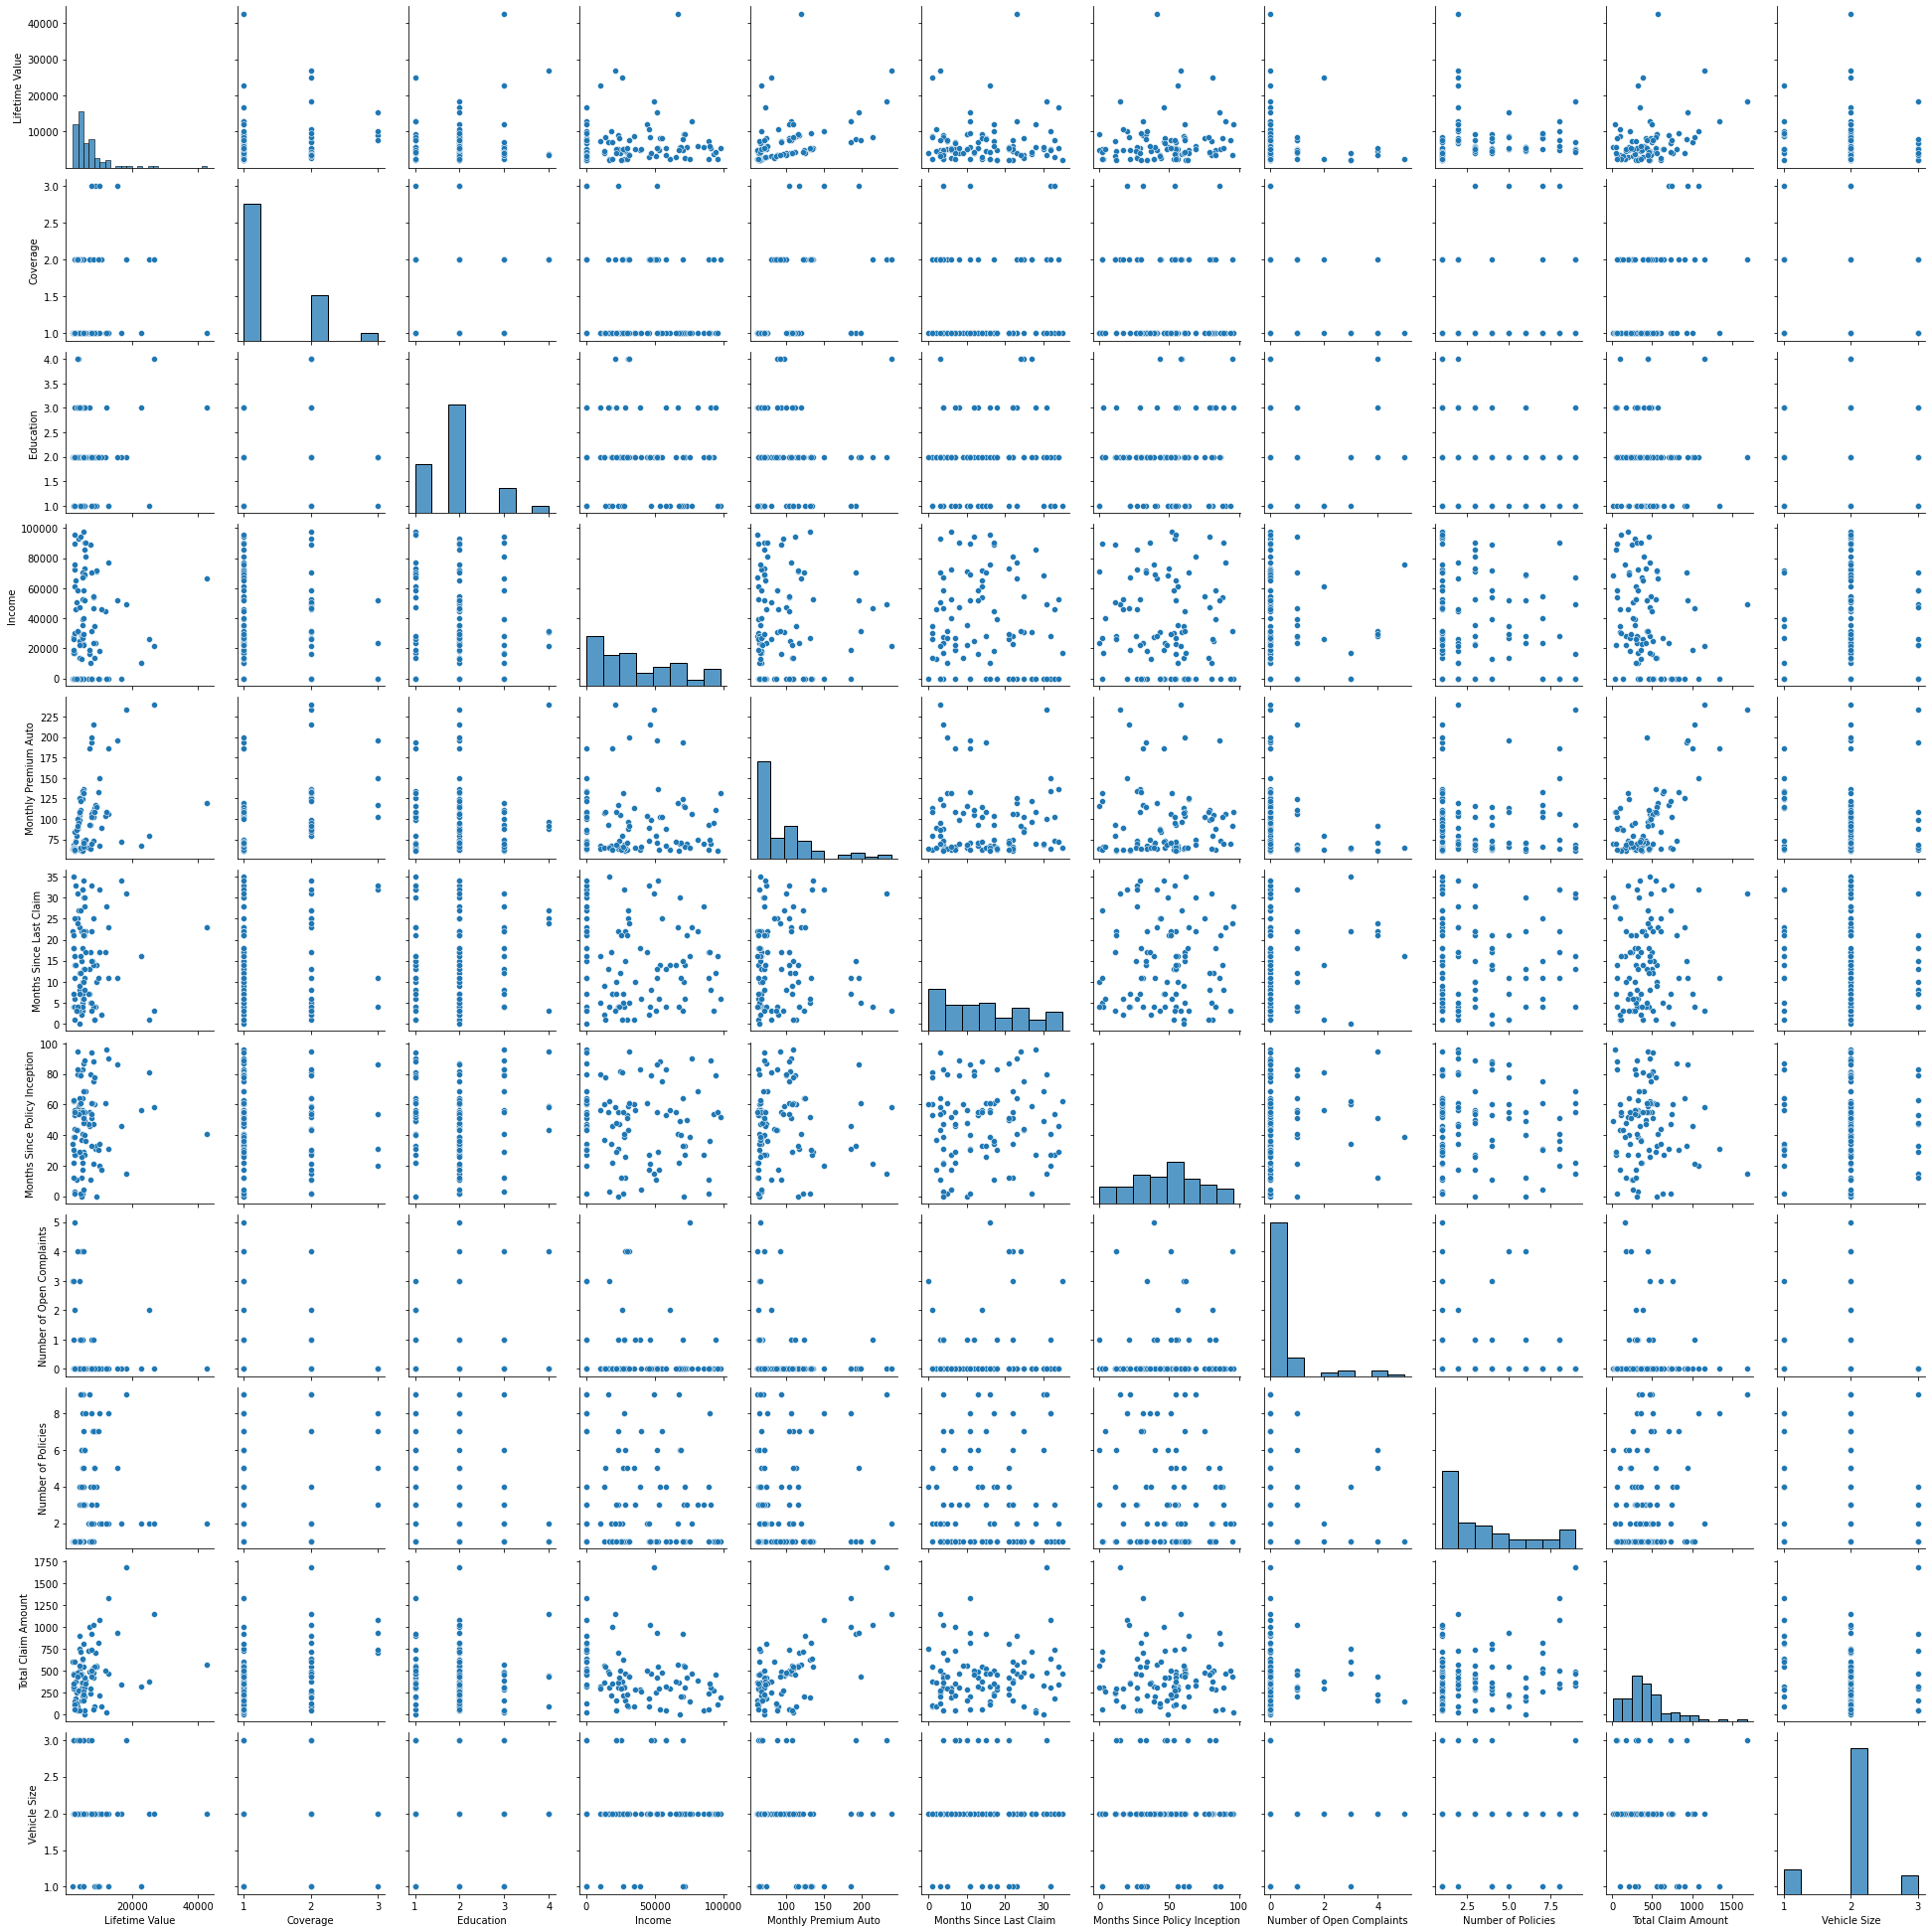

In [102]:
# using seaborn to see from a high level perspective what the relationship between multiple variables.

a = sns.pairplot(train_sample, vars=["Lifetime Value",
                                    "Coverage",
                                    "Education",
                                    "Income",
                                    "Monthly Premium Auto",
                                    "Months Since Last Claim",
                                    "Months Since Policy Inception",
                                    "Number of Open Complaints",
                                    "Number of Policies",
                                    "Total Claim Amount",
                                    "Vehicle Size"])

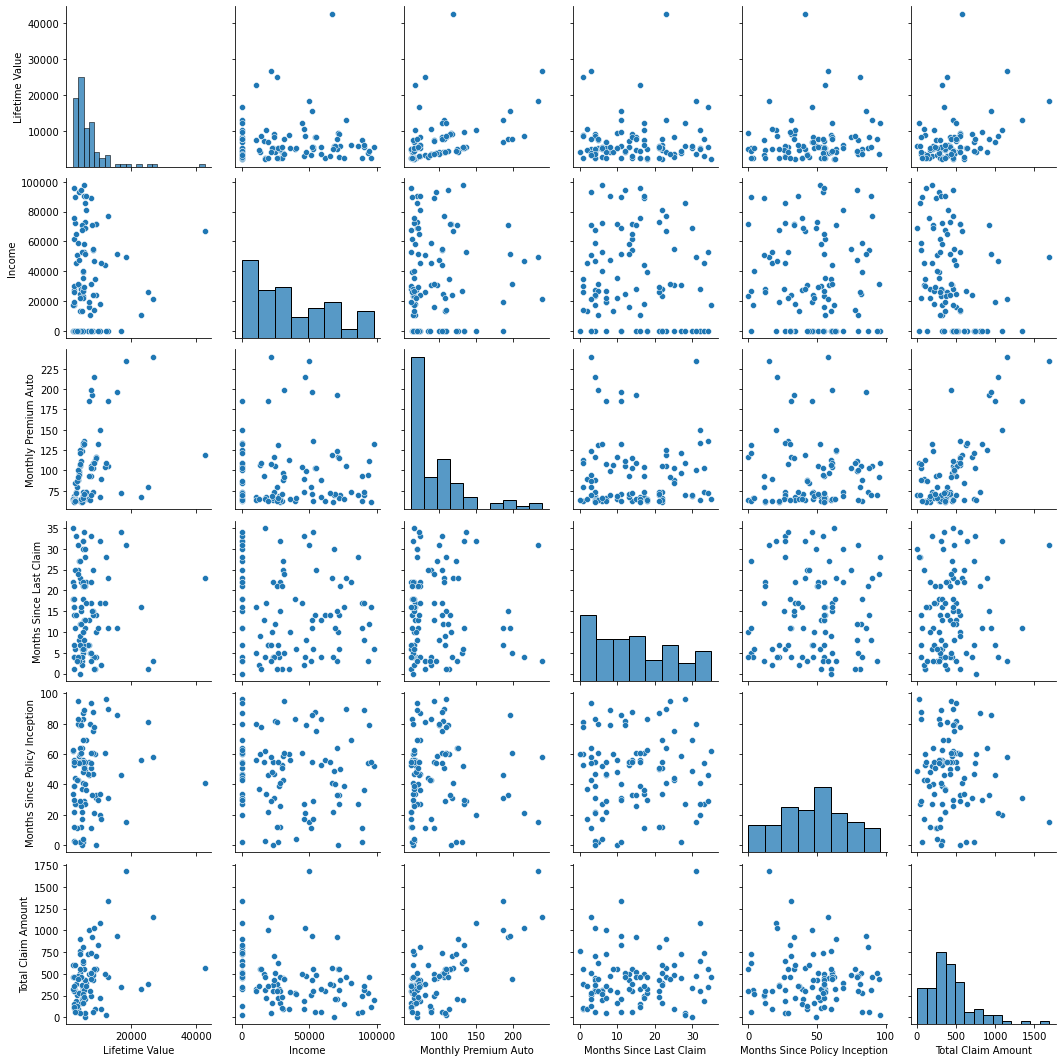

In [103]:
# focusing on interesting visualisations
 
b = sns.pairplot(train_sample, vars=["Lifetime Value",
                                    "Income",
                                    "Monthly Premium Auto",
                                    "Months Since Last Claim",
                                    "Months Since Policy Inception",
                                    "Total Claim Amount"])

In [104]:
# look at total claim amount and monthly premiun auto

px.scatter(train_sample, x = "Monthly Premium Auto",
          y = "Total Claim Amount")

### Week 5 work left to do
* Next we look at seaborn pairplot result, then determine what visualisations to create to further explore the data
&#x2611;
* Then start building model starting with 'Mean Baseline' for both targets we are working with
&#x2611;
* Explore relationship between month since last claim and insurance premium
&#x2611;
* Target column for prediction - Customer Lifetime Value and insurance premium
&#x2611;
* Look at relationship betwen month since policy inception and premium price
&#x2611;
* Look at relationship betwen number of complaints and premium price
&#x2611;
* Look at relationship betwen number of policy and premium price
&#x2611;
* Explore relationship between Total Claim and insurance premium
&#x2611;
* Look at relationship between State and insurance premium and life time value
&#x2611;
* Look at correlation between monthly premium and customer lifetime value
&#x2611;
* Explore vehicle class and number of policy
&#x2611;
* Explore vehicle class and Gender
&#x2611;
* Explore vehicle class and Marital Status
&#x2611;
* Explore vehicle class and employment status
&#x2611;
* Explore vehicle size and insurance premium
&#x2611;
* Explore vehicle size and life time value status
&#x2611;

#### **MONTHLY PREMIUM VALUE MODELS.**

##### Build 2 separate models. A model for Monthly Premium Auto and a model for Customer Lifetime Value

In [105]:
# train test splix x and y

# 2 separate y variables,

# y1 = Monthly Premium Auto 
# y2 = Lifetime Value
# remove leakage future = Total Claim Amount

"""
Total claim amount could be considered data leakage because when you first get an insurance premium,
the new insurance company won't know how much you are going to claim in total claim amount.
But, once you make claims, your insurance premium is going to go up in accordance to your claim amount.

The objective is to predict what your insurance premium is going to be witout knowing how much you are 
going to claim in claim amount. How much you are going to claim is "future" information which means it is
leaking data into our present time of what is insurance premium is and customer lifetime value.
"""
y_train = train["Monthly Premium Auto"]
y_test = test["Monthly Premium Auto"]

In [106]:
print(len(y_train))
y_train 

6598


5249     61
2077    114
6357    102
8128     64
6787     64
       ... 
4219     62
2665     83
6345    103
7554     88
7241     70
Name: Monthly Premium Auto, Length: 6598, dtype: int64

In [107]:
print(len(y_test))
y_test 

1371


708     106
47       71
3995     94
1513     99
3686     69
       ... 
1139     68
6135     85
4140     72
4375     69
8658    108
Name: Monthly Premium Auto, Length: 1371, dtype: int64

In [108]:
# define x variables
# drop leakage column and y variables

# columns to drop from x database

drop_columns = ["Monthly Premium Auto", "Lifetime Value", "Total Claim Amount"]

x_train = train.drop(columns = drop_columns)
x_train.head()

Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
5249        1       0           0       0           0         1          2   
2077        1       0           0       0           0         1          2   
6357        0       1           0       0           0         1          2   
8128        0       0           1       0           0         1          2   
6787        1       0           0       0           0         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
5249   45515      1      0         0        1         0       0   
2077   82664      0      1         0        1         0       0   
6357   25370      0      0         1        1         0       0   
8128       0      1      0         0        0         1       0   
6787       0      0      0         1        0         1       0   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
5249               0             0            1             0             0   
2077               1             0            0             1             0   
6357               0             0            1             0             0   
8128               1             0            0             0             1   
6787               1             0            0             0             1   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
5249             0            0           0            0           0   
2077             0            0           0            0           0   
6357             0            0           0            0           0   
8128             0            0           0            0           0   
6787             0            0           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Two-Door Car  SUV  \
5249           0            1      0       0    0             1    0   
2077           0            0      1       0    0             0    1   
6357           0            0      0       1    0             0    0   
8128           0            1      0       0    0             0    0   
6787           0            0      0       1    0             0    0   

      Sports Car  Four-Door Car  Luxury SUV  Luxury Car  Vehicle Size  \
5249           0              0           0           0             3   
2077           0              0           0           0             2   
6357           1              0           0           0             3   
8128           0              1           0           0             2   
6787           0              1           0           0             2   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      

In [109]:
x_train.shape

(6598, 49)

In [110]:
drop_columns = ["Monthly Premium Auto", "Lifetime Value", "Total Claim Amount"]

x_test = test.drop(columns = drop_columns)
print(x_test.shape)
x_test.head()

(1371, 49)


Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
708         0       0           1       0           0         1          1   
47          0       1           0       0           0         1          1   
3995        0       1           0       0           0         2          2   
1513        0       0           1       0           0         2          2   
3686        0       0           0       0           1         1          1   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
708          1              0           0         0        0     1       0   
47           1              0           0         0        0     0       1   
3995         1              0           0         0        0     0       1   
1513         1              0           0         0        0     0       1   
3686         0              0           0         1        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
708    74585      0      1         0        1         0       0   
47     23218      0      0         1        0         0       1   
3995   94903      0      0         1        1         0       0   
1513   77153      1      0         0        1         0       0   
3686   23769      0      0         1        0         1       0   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   

      Number of Open Complaints  Number of Policies  Personal Auto  \
708                           0                   1              1   
47                            0                   4              1   
3995                          0                   1              1   
1513                          1                   5              1   
3686                          0                   2              1   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
708                0             0            1             0             0   
47                 0             0            0             0             0   
3995               0             0            1             0             0   
1513               0             0            1             0             0   
3686               0             0            0             0             0   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
708              0            0           0            0           0   
47               0            1           0            0           0   
3995             0            0           0            0           0   
1513             0            0           0            0           0   
3686             0            1           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Two-Door Car  SUV  \
708            0            0      1       0    0             0    1   
47             0            0      1       0    0             1    0   
3995           0            0      1       0    0             1    0   
1513           0            0      0       1    0             0    0   
3686           0            0      0       1    0             0    0   

      Sports Car  Four-Door Car  Luxury SUV  Luxury Car  Vehicle Size  \
708            0              0           0           0             2   
47             0              0           0           0             2   
3995           0              0           0           0             1   
1513           0              1           0           0             2   
3686           0              1           0           0             2   

     activation_date  
708       2011-01-17  
47        2011-01-02  
3995      

In [111]:
# baseline model.

# for regression problems, the mean serves as a good baseline
# for classification problems, the mode serves as a good baseline


In [112]:
# mean baseline

mean = y_train.mean()
round(mean, 2)

# without using a model we predict that the insurance premium will be $93.49
# to figure out how wrong we are we calculate the mean squared error

93.49

In [113]:
y_train.describe()

count    6598.000000
mean       93.489845
std        34.530917
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [114]:
error = mean - y_train
error

5249    32.489845
2077   -20.510155
6357    -8.510155
8128    29.489845
6787    29.489845
          ...    
4219    31.489845
2665    10.489845
6345    -9.510155
7554     5.489845
7241    23.489845
Name: Monthly Premium Auto, Length: 6598, dtype: float64

In [115]:
# to get mean absolute error of our mean baseline manually

mean_absolute_error = error.abs().mean()
round(mean_absolute_error, 2)
print(f'By guessing, our insurance premium would be ${round(mean, 2)}\nand we would be off by ${round(mean_absolute_error, 2)}')
# this shows us that we are off by $25.39 and our job is to build a model that reduces that

By guessing, our insurance premium would be $93.49
and we would be off by $25.39


In [116]:
# FIGURE OUT HOW TO MANUALLY CALCULATE MEAN SQUARE ERROR

""" import math

mean_squared_error = math.sqrt(error.mean())
mean_squared_error"""

' import math\n\nmean_squared_error = math.sqrt(error.mean())\nmean_squared_error'

##### Initial Linear Regression Model

In [117]:
# We are going to start with a linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [118]:
x_train 

Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
5249        1       0           0       0           0         1          2   
2077        1       0           0       0           0         1          2   
6357        0       1           0       0           0         1          2   
8128        0       0           1       0           0         1          2   
6787        1       0           0       0           0         1          2   
...       ...     ...         ...     ...         ...       ...        ...   
4219        0       1           0       0           0         1          2   
2665        0       1           0       0           0         2          1   
6345        0       0           0       1           0         1          1   
7554        1       0           0       0           0         2          3   
7241        0       1           0       0           0         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   
...        ...            ...         ...       ...      ...   ...     ...   
4219         1              0           0         0        0     0       1   
2665         1              0           0         0        0     1       0   
6345         1              0           0         0        0     1       0   
7554         1              0           0         0        0     0       1   
7241         1              0           0         0        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
5249   45515      1      0         0        1         0       0   
2077   82664      0      1         0        1         0       0   
6357   25370      0      0         1        1         0       0   
8128       0      1      0         0        0         1       0   
6787       0      0      0         1        0         1       0   
...      ...    ...    ...       ...      ...       ...     ...   
4219   62803      0      0         1        1         0       0   
2665   34498      0      0         1        0         0       1   
6345   25927      0      0         1        0         0       1   
7554   58557      0      1         0        1         0       0   
7241   60707      1      0         0        1         0       0   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   
...                       ...                            ...   
4219                       16                             12   
2665                       30                             72   
6345                        6                             20   
7554                        4                             83   
7241                        2                             24   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   
...                         ...                 ...            ...   
4219                          0                   5              1  

In [119]:
# drop activation date column because linear regression model didn't like it.
x_train = x_train.drop(columns = 'activation_date')

In [120]:
x_train

Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
5249        1       0           0       0           0         1          2   
2077        1       0           0       0           0         1          2   
6357        0       1           0       0           0         1          2   
8128        0       0           1       0           0         1          2   
6787        1       0           0       0           0         1          2   
...       ...     ...         ...     ...         ...       ...        ...   
4219        0       1           0       0           0         1          2   
2665        0       1           0       0           0         2          1   
6345        0       0           0       1           0         1          1   
7554        1       0           0       0           0         2          3   
7241        0       1           0       0           0         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   
...        ...            ...         ...       ...      ...   ...     ...   
4219         1              0           0         0        0     0       1   
2665         1              0           0         0        0     1       0   
6345         1              0           0         0        0     1       0   
7554         1              0           0         0        0     0       1   
7241         1              0           0         0        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
5249   45515      1      0         0        1         0       0   
2077   82664      0      1         0        1         0       0   
6357   25370      0      0         1        1         0       0   
8128       0      1      0         0        0         1       0   
6787       0      0      0         1        0         1       0   
...      ...    ...    ...       ...      ...       ...     ...   
4219   62803      0      0         1        1         0       0   
2665   34498      0      0         1        0         0       1   
6345   25927      0      0         1        0         0       1   
7554   58557      0      1         0        1         0       0   
7241   60707      1      0         0        1         0       0   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   
...                       ...                            ...   
4219                       16                             12   
2665                       30                             72   
6345                        6                             20   
7554                        4                             83   
7241                        2                             24   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   
...                         ...                 ...            ...   
4219                          0                   5              1  

In [121]:
# drop activation date column because linear regression model didn't like it.
x_test = x_test.drop(columns = 'activation_date')

In [122]:
x_test

Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
708         0       0           1       0           0         1          1   
47          0       1           0       0           0         1          1   
3995        0       1           0       0           0         2          2   
1513        0       0           1       0           0         2          2   
3686        0       0           0       0           1         1          1   
...       ...     ...         ...     ...         ...       ...        ...   
1139        0       0           1       0           0         1          1   
6135        0       0           0       0           1         2          1   
4140        0       0           1       0           0         1          2   
4375        1       0           0       0           0         1          2   
8658        0       0           1       0           0         3          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
708          1              0           0         0        0     1       0   
47           1              0           0         0        0     0       1   
3995         1              0           0         0        0     0       1   
1513         1              0           0         0        0     0       1   
3686         0              0           0         1        0     0       1   
...        ...            ...         ...       ...      ...   ...     ...   
1139         1              0           0         0        0     1       0   
6135         0              0           0         1        0     0       1   
4140         1              0           0         0        0     1       0   
4375         1              0           0         0        0     0       1   
8658         0              0           0         1        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
708    74585      0      1         0        1         0       0   
47     23218      0      0         1        0         0       1   
3995   94903      0      0         1        1         0       0   
1513   77153      1      0         0        1         0       0   
3686   23769      0      0         1        0         1       0   
...      ...    ...    ...       ...      ...       ...     ...   
1139   92593      0      1         0        0         0       1   
6135   27431      0      0         1        1         0       0   
4140   68342      0      1         0        1         0       0   
4375   62902      0      1         0        1         0       0   
8658   17705      0      0         1        1         0       0   

      Months Since Last Claim  Months Since Policy Inception  \
708                         1                             49   
47                          7                             10   
3995                        3                             38   
1513                        3                             27   
3686                       18                             14   
...                       ...                            ...   
1139                        4                             53   
6135                        2                             39   
4140                       33                             39   
4375                       14                             94   
8658                        7                             19   

      Number of Open Complaints  Number of Policies  Personal Auto  \
708                           0                   1              1   
47                            0                   4              1   
3995                          0                   1              1   
1513                          1                   5              1   
3686                          0                   2              1   
...                         ...                 ...            ...   
1139                          0                   1              0  

In [123]:
# fitting linear regression model

lrModel = lr.fit(x_train, y_train)

In [124]:
# predicting y_values using test dataset

y_pred = lrModel.predict(x_test)

In [125]:
y_pred

array([109.05973068,  66.14029986,  90.27284477, ...,  66.02518631,
        66.52756075, 111.96674027])

In [126]:
# compare our model prediction to the actual values.
y_testA = list(y_test)

print(y_pred[0]) # predicted value for first row
print(y_testA[0]) # actual value for first row
print(f'The actual value for the first row is ${round(y_testA[0], 2)}\nbut the predicted value is ${round(y_pred[0], 2)}')

109.05973067728175
106
The actual value for the first row is $106
but the predicted value is $109.06


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression mean absolute error ${round(mae, 2)}')
print(f'Linear Regression mean squared error ${round(mse, 2)}')

# Using the Linear Regression Model we have reduced our mean absolute error to $5.19

Linear Regression mean absolute error $5.19
Linear Regression mean squared error $50.99


In [128]:
# look at what coefficient contributed to the score in our linear regression model

coeff = lrModel.coef_
coeff

array([-3.40827157e-01,  5.32053892e-02,  8.62428949e-02, -2.51542010e-01,
        4.52920883e-01,  2.29293146e+01,  2.46624712e-01,  1.54709216e-01,
        3.87324410e-01,  1.77359650e-01, -1.48963652e-01, -5.70429624e-01,
       -1.99839997e-01,  1.99839997e-01,  9.96747585e-06, -1.21599854e-01,
       -2.06314665e-01,  3.27914520e-01, -1.26289742e-01,  2.82320826e-01,
       -1.56031084e-01,  7.16798981e-03,  4.90828293e-03,  5.64885899e-03,
        2.77723382e-02,  6.45451283e-02,  5.23423938e-02, -1.16887522e-01,
       -2.96030853e-02, -2.36125877e-01, -2.83284130e-01,  5.71752401e-01,
       -5.23555992e-02,  1.26733371e+00,  1.46503813e-01, -7.36438894e-01,
       -6.47782334e-01,  5.85363585e-02, -6.48785045e-02, -1.42707078e-01,
        1.49049224e-01, -5.82855094e+01, -1.50947982e+01, -1.39022634e+01,
       -5.85045414e+01,  7.25148485e+01,  7.32722639e+01, -1.64150308e-01])

In [129]:
intercept = lrModel.intercept_
intercept

100.6094485680306

In [130]:
y_pred.mean()
# our predictable mean is $91.49

91.48676374618447

In [131]:
# first see what features are most important in the linear regression model

# and then build out something where you can input different numbers and get a prediction

# when I build the flask app, I want the users to input their data and get a prediction.

##### Which features has significant impact in predicting Auto Insurance Premium


In [132]:
x_train.columns

Index(['Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'Coverage',
       'Education', 'Employed', 'Medical Leave', 'Unemployed', 'Disabled',
       'Retired', 'Male', 'Female', 'Income', 'Urban', 'Rural', 'Suburban',
       'Married', 'Divorced', 'Single', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Personal Auto', 'Corporate Auto', 'Special Auto',
       'Personal L3', 'Corporate L3', 'Corporate L2', 'Corporate L1',
       'Personal L2', 'Special L3', 'Personal L1', 'Special L2', 'Special L1',
       'Call Center', 'Agent', 'Branch', 'Web', 'Two-Door Car', 'SUV',
       'Sports Car', 'Four-Door Car', 'Luxury SUV', 'Luxury Car',
       'Vehicle Size'],
      dtype='object')

In [133]:
# plotting the coefficients from linear Regression Model.
columns = x_train.columns

# series between columns and coefficients
lrGraph = pd.Series(coeff, columns)

In [134]:
lrGraph

Arizona                          -0.340827
Oregon                            0.053205
California                        0.086243
Nevada                           -0.251542
Washington                        0.452921
Coverage                         22.929315
Education                         0.246625
Employed                          0.154709
Medical Leave                     0.387324
Unemployed                        0.177360
Disabled                         -0.148964
Retired                          -0.570430
Male                             -0.199840
Female                            0.199840
Income                            0.000010
Urban                            -0.121600
Rural                            -0.206315
Suburban                          0.327915
Married                          -0.126290
Divorced                          0.282321
Single                           -0.156031
Months Since Last Claim           0.007168
Months Since Policy Inception     0.004908
Number of O

Text(0.5, 1.0, 'Visualisation for Linear Regression Model Coefficients')

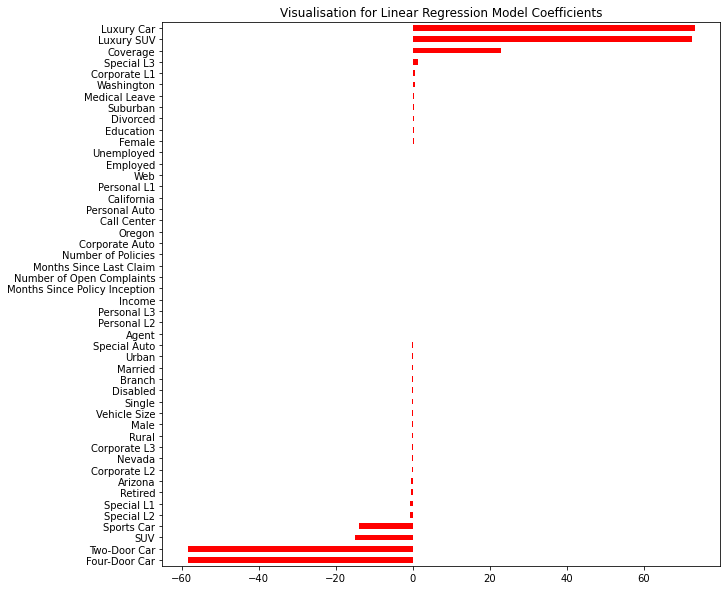

In [135]:
# Visualisation for Linear Regression Model and Model Interpretation. Getting an idea of the model prediction
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(figsize=(10,10))

lrGraph.sort_values().plot.barh(color='red')

plt.title('Visualisation for Linear Regression Model Coefficients')
# This graph is showing us positive and negative impacts i.e higher premiums and lower premiums 
# Having a Luxury Car, SUV and Coverage increase your insurance premium by a lot. 
# Having these positively impacted the prediction meaning you end up paying more as compared to having a
# four door car, two door car SUV and Sports car. These have negative impact on your Insurance Premium meaning you pay less
# Things like the Income, Gender, Number of Policies etc have no impact on your insurance premiums
# Being in Arizona, Nevada states will have lower insurance premium as compared to Washington state 

#### Repeat the process using a different Model 

In [136]:
# to find out what type of models to try for models always start with the altra basic models like e.g 
# Linear Regression Model etc. Google sklearn.linear_model

#### Random Forest Model

In [137]:
# Building a single code cell
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

# fitting random forest regression model

rfModel = rf.fit(x_train, y_train)

# predicting y_values using test dataset

y_pred_r = rfModel.predict(x_test)

mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'Random Forest Regression mean absolute error ${round(mae_r, 2)}')
print(f'Random Forest Regression mean squared error ${round(mse_r, 2)}')



Random Forest Regression mean absolute error $4.26
Random Forest Regression mean squared error $32.42


In [138]:
# feature imporntances from random forest model

importances = rfModel.feature_importances_
importances

array([4.75370415e-04, 4.18932261e-04, 4.78103246e-04, 3.23247565e-04,
       3.09870230e-04, 1.97164167e-01, 1.24084360e-03, 2.08068153e-04,
       2.04715199e-04, 1.99553932e-04, 2.32397057e-04, 1.21066396e-04,
       3.51502188e-04, 3.55052368e-04, 4.30368827e-03, 3.92744599e-04,
       3.51028937e-04, 4.26381929e-04, 4.29766406e-04, 3.73870056e-04,
       3.99002853e-04, 4.23999280e-03, 4.91102224e-03, 1.06686071e-03,
       2.19615390e-03, 3.05964701e-04, 2.47552511e-04, 1.16225595e-04,
       4.78762214e-04, 2.53376165e-04, 2.08533848e-04, 2.40938937e-04,
       4.32876013e-04, 6.58987184e-05, 5.67334304e-04, 5.72642548e-05,
       5.08720546e-05, 4.81246377e-04, 5.25559468e-04, 6.53515151e-04,
       4.15234535e-04, 1.58227834e-02, 1.95116096e-01, 8.28477134e-02,
       1.18855377e-02, 2.45290288e-01, 2.21812338e-01, 9.50685888e-04])

#### Interpreting Random Forest Model

Text(0.5, 1.0, 'Visualisation for Random Forest Regression Model Feature Importances')

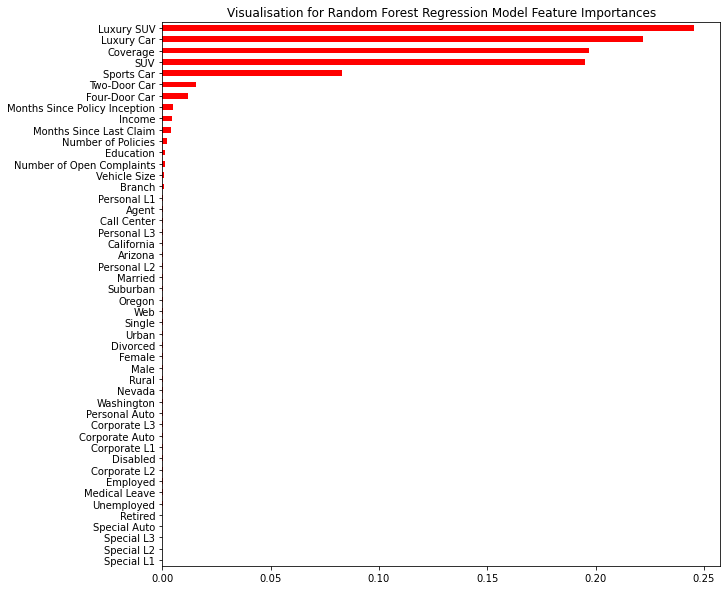

In [139]:
# interpreting random forest model.

importances = rfModel.feature_importances_

# columns used in random forest model.
columns = x_train.columns

# series between columns and feature importances
rfGraph = pd.Series(importances, columns)

# Visualisation for Random Forest Regression Model and Model Interpretation. Getting an idea of the model prediction
figure(figsize=(10,10))

rfGraph.sort_values().plot.barh(color='red')

plt.title('Visualisation for Random Forest Regression Model Feature Importances')

# Random Forest Feature Importances work by giving us the impact of each feature on the premiums as compared to 
# Linear Regression which showed us the positive and negative impacts 
# This graph is showing us that features from Personal L1 to Special L1 does't have very much impact on your 
# insurance premiums. What has the most impact on the premiums is the type of vehicle you have eg Luxury SUV or Luxury Car
# Also Income, Months Since Policy Inception, months Since Last Claim has a little bit of impact   

### Week 6 work left to do
* Hyperparameter tune random forest model to see if we can get a better and lower error score
&#x2611;
* Build a linear regression model and random forest model 'Customer Lifetime Value' objective
* Rebuld models for 'Customer Lifetime Value' prediction and 'Insurance Premium' using the best features. This will allow us to have less features when creating model interpretations and will allow us to have less features when we start building flask app
* Build different model interpritations for random forest models
* Re-factor the code
* Figure out how to build a flask app and put it on line so that users can put in values for the important features we discovered and get a prediction  for their insurance premium, and Customer Lifetime Value.
* Build a plotly app to put prediction life expectancy project online.

##### Try an idea. Re-do Random Forest Model with top 10 features.

In [140]:
x_train.head()

Arizona  Oregon  California  Nevada  Washington  Coverage  Education  \
5249        1       0           0       0           0         1          2   
2077        1       0           0       0           0         1          2   
6357        0       1           0       0           0         1          2   
8128        0       0           1       0           0         1          2   
6787        1       0           0       0           0         1          2   

      Employed  Medical Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Married  Divorced  Single  \
5249   45515      1      0         0        1         0       0   
2077   82664      0      1         0        1         0       0   
6357   25370      0      0         1        1         0       0   
8128       0      1      0         0        0         1       0   
6787       0      0      0         1        0         1       0   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
5249               0             0            1             0             0   
2077               1             0            0             1             0   
6357               0             0            1             0             0   
8128               1             0            0             0             1   
6787               1             0            0             0             1   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
5249             0            0           0            0           0   
2077             0            0           0            0           0   
6357             0            0           0            0           0   
8128             0            0           0            0           0   
6787             0            0           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Two-Door Car  SUV  \
5249           0            1      0       0    0             1    0   
2077           0            0      1       0    0             0    1   
6357           0            0      0       1    0             0    0   
8128           0            1      0       0    0             0    0   
6787           0            0      0       1    0             0    0   

      Sports Car  Four-Door Car  Luxury SUV  Luxury Car  Vehicle Size  
5249           0              0           0           0             3  
2077           0              0           0           0             2  
6357           1              0           0           0             3  
8128           0              1           0           0             2  
6787           0              1           0           0             2

In [141]:
rfGraph.sort_values(ascending=False)[:10]

Luxury SUV                       0.245290
Luxury Car                       0.221812
Coverage                         0.197164
SUV                              0.195116
Sports Car                       0.082848
Two-Door Car                     0.015823
Four-Door Car                    0.011886
Months Since Policy Inception    0.004911
Income                           0.004304
Months Since Last Claim          0.004240
dtype: float64

In [142]:
top_10_features = ['Luxury SUV', 'Luxury Car', 'SUV', 'Coverage', 'Sports Car', 'Two-Door Car',
                   'Four-Door Car', 'Months Since Policy Inception', 'Income', 'Months Since Last Claim']

x_train2 = x_train[top_10_features]

x_test2 = x_test[top_10_features]

In [143]:
x_train2.head()

Luxury SUV  Luxury Car  SUV  Coverage  Sports Car  Two-Door Car  \
5249           0           0    0         1           0             1   
2077           0           0    1         1           0             0   
6357           0           0    0         1           1             0   
8128           0           0    0         1           0             0   
6787           0           0    0         1           0             0   

      Four-Door Car  Months Since Policy Inception  Income  \
5249              0                             33   45515   
2077              0                             10   82664   
6357              0                             77   25370   
8128              1                             89       0   
6787              1                             61       0   

      Months Since Last Claim  
5249                       14  
2077                       24  
6357                       10  
8128                       25  
6787                        4

In [144]:
x_test2.head()

Luxury SUV  Luxury Car  SUV  Coverage  Sports Car  Two-Door Car  \
708            0           0    1         1           0             0   
47             0           0    0         1           0             1   
3995           0           0    0         2           0             1   
1513           0           0    0         2           0             0   
3686           0           0    0         1           0             0   

      Four-Door Car  Months Since Policy Inception  Income  \
708               0                             49   74585   
47                0                             10   23218   
3995              0                             38   94903   
1513              1                             27   77153   
3686              1                             14   23769   

      Months Since Last Claim  
708                         1  
47                          7  
3995                        3  
1513                        3  
3686                       18

In [145]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(random_state=42)

# fitting random forest regression model

rfModel2 = rf.fit(x_train2, y_train)

# predicting y_values using test dataset

y_pred_rf2 = rfModel2.predict(x_test2)

mae_rf2 = mean_absolute_error(y_test, y_pred_rf2)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
print(f'Random Forest Regression mean absolute error ${round(mae_rf2, 2)}')
print(f'Random Forest Regression mean squared error ${round(mse_rf2, 2)}')

Random Forest Regression mean absolute error $4.28
Random Forest Regression mean squared error $35.43


#### Hyperparameter Tuning Random Forest Model to see if we can get lower error scores

Information on how to use grid search cv with a pipeline. https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [146]:
# what parameter should we tune (go to Grid search cv sklearn and random forest regressor on google to find which 
# hyperpapameters we can tune)
# we can tune n_estimators, criterion (mse), max_depth, mim_sample_split and more 
# hyperparameter tune one item at a time because tuning a lot of features at the same time will take a long time to do 
# Grid search CV or random search CV

In [147]:
# lets hyperparameter tune 'number of estimators'

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42)

params = {'n_estimators': [50, 100, 200, 300, 400, 500]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

In [148]:
# fitting grid search cv.

search_model = search.fit(x_train2, y_train)

In [149]:
# best scores from the model.
search_model.best_params_

{'n_estimators': 500}

In [150]:
y_pred_search = search_model.predict(x_test2)

In [151]:
mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error ${round(mae_search, 2)}')
print(f'Grid Search CV mean squared error ${round(mse_search, 2)}')

Grid Search CV mean absolute error $4.27
Grid Search CV mean squared error $35.46


In [152]:
# lets hyperparameter tune 'number of estimators'

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42)

params = {'n_estimators': [500, 600, 700, 800, 900, 1000]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv.

search_model = search.fit(x_train2, y_train)

# best scores from the model.

print(f'Best Parameters {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error ${round(mae_search, 2)}')
print(f'Grid Search CV mean squared error ${round(mse_search, 2)}')

Best Parameters {'n_estimators': 700}
Grid Search CV mean absolute error $4.26
Grid Search CV mean squared error $35.38


In [153]:
search_model

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [500, 600, 700, 800, 900, 1000]})

In [154]:
# lets hyperparameter tune 'maximum depth of tree'

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                                n_estimators = 700)

params = {'max_depth': [5, 10, 15, 20, 25]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv.

search_model = search.fit(x_train2, y_train)

# best scores from the model.

print(f'Best Parameters {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error ${round(mae_search, 2)}')
print(f'Grid Search CV mean squared error ${round(mse_search, 2)}')

Best Parameters {'max_depth': 15}
Grid Search CV mean absolute error $4.42
Grid Search CV mean squared error $34.33


In [155]:
# lets hyperparameter tune 'maximum features to consider for each split'

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                                n_estimators = 700,
                               max_depth = 15)

params = {'max_features': [2, 4, 6, 8, 10]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv.

search_model = search.fit(x_train2, y_train)

# best scores from the model.

print(f'Best Parameters {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error ${round(mae_search, 2)}')
print(f'Grid Search CV mean squared error ${round(mse_search, 2)}')

Best Parameters {'max_features': 6}
Grid Search CV mean absolute error $4.39
Grid Search CV mean squared error $33.6


In [156]:
# lets hyperparameter tune 'maximum depth of tree'

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                                n_estimators = 700)

params = {'max_depth': [15, 20, None]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv.

search_model = search.fit(x_train2, y_train)

# best scores from the model.

print(f'Best Parameters {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error ${round(mae_search, 2)}')
print(f'Grid Search CV mean squared error ${round(mse_search, 2)}')

Best Parameters {'max_depth': 15}
Grid Search CV mean absolute error $4.42
Grid Search CV mean squared error $34.33


#### Final model for Insurance Premium using Random Forest Model

In [157]:
model = RandomForestRegressor(random_state=42,
                                n_estimators = 700,
                               max_depth = 15,
                               max_features = 6)

model.fit(x_train2, y_train)

y_pred_final = model.predict(x_test2)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f'Final Random Forest Regressor mean absolute error ${round(mae_final, 2)}')
print(f'Final Random Forest Regressor mean squared error ${round(mse_final, 2)}')


Final Random Forest Regressor mean absolute error $4.39
Final Random Forest Regressor mean squared error $33.6


In [158]:
y_pred_final[1]
# this is our predicted value for our y_test index 1 (this can be done using different index values like 5 or) 

65.91182077256357

In [159]:
# predicted values
y_pred_final[:5]
# you can do for the first 5 values and you can see these are the 5 values from the predicted values

array([111.91550821,  65.91182077,  93.04745683,  84.87224257,
        66.76974904])

In [160]:
list(y_test)[1]
# this is the actual value using index 1 or you can use different index values like 5 or so

71

In [161]:
# actual values 
list(y_test)[:5]
# you can do for the first 5 values and these are the first five actual values

[106, 71, 94, 99, 69]

#### Gradient Boosting Model Testing

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
# fitting gradient boosting model on entire x train withoutextracting top ten features
gbModel = GradientBoostingRegressor(random_state = 42)

gbModel.fit(x_train, y_train)

y_pred_gb = gbModel.predict(x_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'GradientBoosting Regressor mean absolute error ${round(mae_gb, 2)}')
print(f'GradientBoosting Regressor mean squared error ${round(mse_gb, 2)}')


GradientBoosting Regressor mean absolute error $4.75
GradientBoosting Regressor mean squared error $36.29


In [164]:
importances = gbModel.feature_importances_
importances

array([1.13788201e-04, 4.21745537e-06, 1.33747431e-06, 8.00746819e-07,
       1.48602309e-04, 2.02196678e-01, 1.87705066e-04, 0.00000000e+00,
       1.44727808e-05, 0.00000000e+00, 2.92738842e-05, 3.43410437e-05,
       1.80243152e-05, 3.34211467e-05, 4.51221532e-04, 1.92795513e-05,
       0.00000000e+00, 1.19613995e-05, 1.85448162e-06, 2.58367194e-05,
       2.69704665e-05, 3.55522486e-04, 4.17308634e-04, 2.34955017e-04,
       1.47941613e-04, 2.22958411e-05, 0.00000000e+00, 0.00000000e+00,
       1.61873238e-05, 1.39160730e-06, 1.70933233e-05, 7.49980468e-05,
       2.23247781e-05, 5.94406085e-06, 4.12100181e-06, 0.00000000e+00,
       4.35445837e-05, 4.59311932e-06, 3.36899186e-05, 4.69564772e-05,
       1.56816006e-05, 1.63922988e-01, 1.16040817e-01, 2.18781014e-03,
       1.20099292e-01, 2.01157168e-01, 1.91771013e-01, 3.65764183e-05])

Text(0.5, 1.0, 'Visualisation for Gradient Boosting Regression Model Feature Importances')

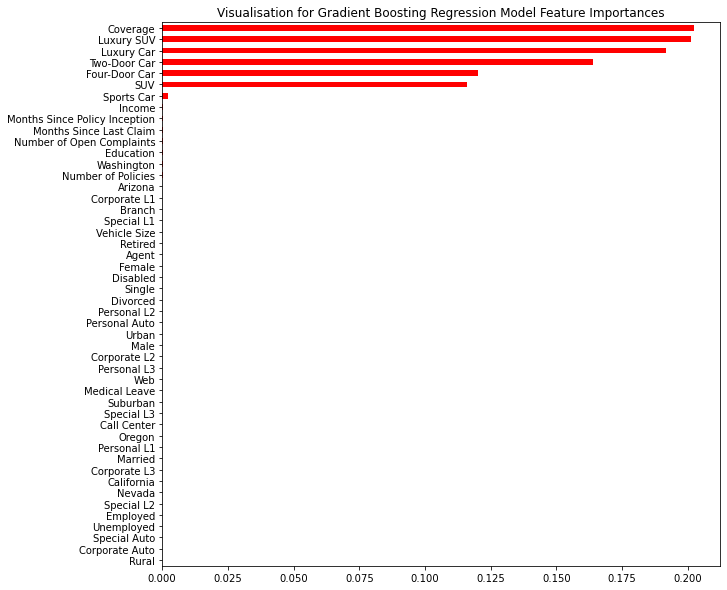

In [165]:
# Interpreting Gradient Boosting Model

gbimportances = gbModel.feature_importances_

# columns used in Gradient Boosting Model.
columns = x_train.columns

# series between columns and feature importances
gbGraph = pd.Series(gbimportances, columns)

# Visualisation for Gradient Boosting Regression Model and Model Interpretation. Getting an idea of the model prediction
figure(figsize=(10,10))

gbGraph.sort_values().plot.barh(color='red')

plt.title('Visualisation for Gradient Boosting Regression Model Feature Importances')

# from the gradient boosting model the top 6 features are the best features 

In [166]:
# fitting Gradient Boosting Model on top 10 features from x_train

gbModel2 = GradientBoostingRegressor(random_state = 42)

gbModel2.fit(x_train2, y_train)

y_pred_gb2 = gbModel2.predict(x_test2)

mae_gb2 = mean_absolute_error(y_test, y_pred_gb2)
mse_gb2 = mean_squared_error(y_test, y_pred_gb2)
print(f'GradientBoosting Regressor mean absolute error ${round(mae_gb2, 2)}')
print(f'GradientBoosting Regressor mean squared error ${round(mse_gb2, 2)}')

GradientBoosting Regressor mean absolute error $4.74
GradientBoosting Regressor mean squared error $36.16


We can conclude that Random Forest model is the best model that we have because it's giving us the lowest error scores for our prediction. The Gradient Boosting model did not improve on the error score.  

In [167]:
x_train2.head()

Luxury SUV  Luxury Car  SUV  Coverage  Sports Car  Two-Door Car  \
5249           0           0    0         1           0             1   
2077           0           0    1         1           0             0   
6357           0           0    0         1           1             0   
8128           0           0    0         1           0             0   
6787           0           0    0         1           0             0   

      Four-Door Car  Months Since Policy Inception  Income  \
5249              0                             33   45515   
2077              0                             10   82664   
6357              0                             77   25370   
8128              1                             89       0   
6787              1                             61       0   

      Months Since Last Claim  
5249                       14  
2077                       24  
6357                       10  
8128                       25  
6787                        4

In [168]:
# setting what coverage means
x_train2['Coverage'].describe()

count    6598.000000
mean        1.475447
std         0.651431
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Coverage, dtype: float64

In [169]:
# testing what prediction will be using dummy data. 
test_data = [[1, 1, 2, 0, 1, 0, 1, 20, 50000, 10]]

Let's assume you have a Luxury SUV (1), a Luxury Car (1), your insurance coverage type is (2), you don't have SUV (0),
Sports Car (1), Two Door (0), Four Door Car (1), Months Since Policy Inception (20mnths), Income (50000) and 
Months Since Last Claim is 10 your predicted insurance premium is going to be $161.04  

In [170]:
model.predict(test_data)

array([161.0430817])

###### Defining final features to use to predict insurance premium. MAYBE in the futurejust use type of cars as the insurance premium predictor.

#### Shapley Plot for Best performing model

Shapley Plot is a technique that is used to explain Block box models like Random Forest. Basically to help us to see how the Random Forest makes its decision on predictions.

In [171]:
# pip install shap
import shap

In [172]:
model = RandomForestRegressor(random_state=42,
                                n_estimators = 700,
                               max_depth = 15,
                               max_features = 6)

model.fit(x_train2, y_train)

y_pred_final = model.predict(x_test2)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f'Final Random Forest Regressor mean absolute error ${round(mae_final, 2)}')
print(f'Final Random Forest Regressor mean squared error ${round(mse_final, 2)}')

Final Random Forest Regressor mean absolute error $4.39
Final Random Forest Regressor mean squared error $33.6


In [173]:
# function to do shapley plots.

def shapley(x_train, y_train, x_test, row_number=0):
    
    model = RandomForestRegressor(random_state=42,
                                n_estimators = 700,
                               max_depth = 15,
                               max_features = 6)
    
    model.fit(x_train, y_train)
    
    # defining what row to examine in the shapley plot
    row = x_test.iloc[[row_number]]
    
    # predicting
    pred = model.predict(row)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(row)
    
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    
    # printing results
    
    """results = f'{pred[0]:.1f}is the predicted insurance premium. \n\n'
    results += f'Starting from baseline of ${explainer.expected_value:.1f} \n\n'
    results += shaps.to_string()
    print(result)"""
    
    shap.initjs()
    
    return shap.force_plot(
        base_value = explainer.expected_value,
        shap_values = shap_values,
        features=row)
    

In [174]:
x_test2.head()

Luxury SUV  Luxury Car  SUV  Coverage  Sports Car  Two-Door Car  \
708            0           0    1         1           0             0   
47             0           0    0         1           0             1   
3995           0           0    0         2           0             1   
1513           0           0    0         2           0             0   
3686           0           0    0         1           0             0   

      Four-Door Car  Months Since Policy Inception  Income  \
708               0                             49   74585   
47                0                             10   23218   
3995              0                             38   94903   
1513              1                             27   77153   
3686              1                             14   23769   

      Months Since Last Claim  
708                         1  
47                          7  
3995                        3  
1513                        3  
3686                       18

In [175]:
x_test2.iloc[0]

Luxury SUV                           0
Luxury Car                           0
SUV                                  1
Coverage                             1
Sports Car                           0
Two-Door Car                         0
Four-Door Car                        0
Months Since Policy Inception       49
Income                           74585
Months Since Last Claim              1
Name: 708, dtype: int64

In [176]:
shapley(x_train2, y_train, x_test2)

In [177]:
x_test2.iloc[20]

Luxury SUV                           0
Luxury Car                           0
SUV                                  0
Coverage                             1
Sports Car                           0
Two-Door Car                         0
Four-Door Car                        1
Months Since Policy Inception       63
Income                           24910
Months Since Last Claim              7
Name: 6848, dtype: int64

In [178]:
shapley(x_train2, y_train, x_test2, row_number=20)

### Week 7 work left to do
* Build a linear regression model and random forest model 'Customer Lifetime Value' objective
* Rebuld models for 'Customer Lifetime Value' prediction and 'Insurance Premium' using the best features. This will allow us to have less features when creating model interpretations and will allow us to have less features when we start building flask app
* Build different model interpritations for random forest models
* Re-factor the code
* Figure out how to build a flask app and put it on line so that users can put in values for the important features we discovered and get a prediction  for their insurance premium, and Customer Lifetime Value.
* Build a plotly app to put prediction life expectancy project online.

#### Now working on predicting "Customer Lifetime Value"

In [179]:
# define new y_target, and new x_target.
# then do a baseline model
# then do a linear regression model
# linear regression model explanation
# then do Random Forest model
# Random Forest model explanation

In [180]:
# define x and y values for customer lifetime value

# keeping x_train and x_test the same

x_train_ltv = x_train
x_test_ltv = x_test

# define y_variables

y_train_ltv = train['Lifetime Value']
y_test_ltv = test['Lifetime Value']

In [181]:
# mean baseline = random guess.
# If I were to guess what the lifetime value of the customer is,

mean_ltv = y_train_ltv.mean()
round(mean_ltv, 2)

# this will be my guess $7954.82

7954.82

In [182]:
error_ltv = mean_ltv - y_train_ltv

# mean absolute error of our mean baseline

mean_ltv_absolute_error = error_ltv.abs().mean()
print(f'By guessing, our our customer lifetime value would be ${round(mean_ltv, 2)}\nand we would be off by ${round(mean_ltv_absolute_error, 2)}')
# this shows us that we are off by $4345.01 and our job is to build a model that reduces that

By guessing, our our customer lifetime value would be $7954.82
and we would be off by $4345.01


In [183]:
# linear regrssion model for customer lifetime value

lr_ltv = LinearRegression()

# fitting linear regression model

lr_ltvModel = lr_ltv.fit(x_train_ltv, y_train_ltv)

# predicting y_values using test dataset

y_pred_ltv = lr_ltvModel.predict(x_test_ltv)

mae_ltv = mean_absolute_error(y_test_ltv, y_pred_ltv)
mse_ltv = mean_squared_error(y_test_ltv, y_pred_ltv)
print(f'Linear Regression mean absolute error ${round(mae_ltv, 2)}')
print(f'Linear Regression mean squared error ${round(mse_ltv, 2)}')


Linear Regression mean absolute error $4106.08
Linear Regression mean squared error $46342633.63


Text(0.5, 1.0, 'Visualisation for Linear Regression Model Coefficients')

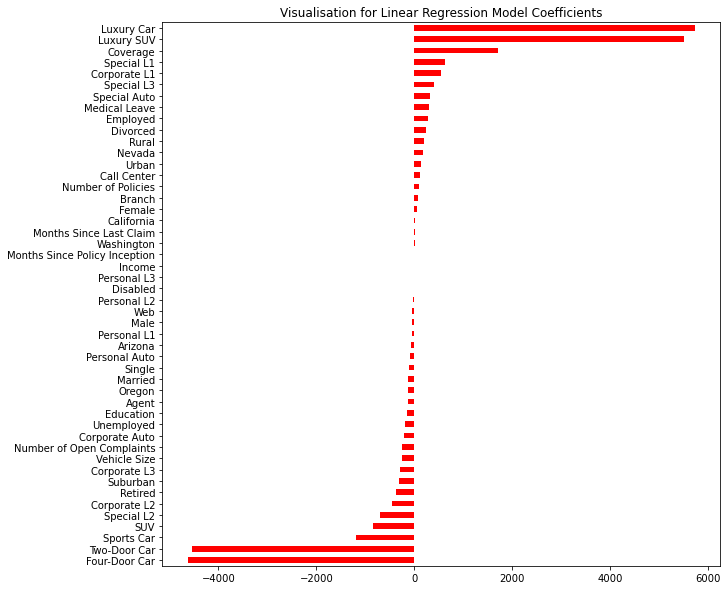

In [184]:
# visualising coefficient for customer lifetime value using linear regression

# look at what coefficient contributed to the score in our linear regression model

coeff_ltv = lr_ltvModel.coef_

# plotting the coefficients from linear Regression Model.
columns = x_train_ltv.columns

# series between columns and coefficients
lr_ltvGraph = pd.Series(coeff_ltv, columns)

# Visualisation for Linear Regression Model and Model Interpretation. Getting an idea of the model prediction
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(figsize=(10,10))

lr_ltvGraph.sort_values().plot.barh(color='red')

plt.title('Visualisation for Linear Regression Model Coefficients')

# these are the things that contribute to customer lifetime value
# Months Since Policy Inception, Income, Personal L3 and Disabled doen't have effect on costomer lifetime value

In [185]:
# build a random forest model for customer lifetime value

from sklearn.ensemble import RandomForestRegressor

rf_ltv = RandomForestRegressor(random_state=42)

# fitting random forest regression model

rf_ltvModel = rf_ltv.fit(x_train_ltv, y_train_ltv)

# predicting y_values using test dataset

y_pred_r_ltv = rf_ltvModel.predict(x_test_ltv)

mae_r_ltv = mean_absolute_error(y_test_ltv, y_pred_r_ltv)
mse_r_ltv = mean_squared_error(y_test_ltv, y_pred_r_ltv)
print(f'Random Forest Regression mean absolute error ${round(mae_r_ltv, 2)}')
print(f'Random Forest Regression mean squared error ${round(mse_r_ltv, 2)}')

# this has predicted so much bettter than $1677.33 as compared to the Linear Regression mean absolute error of $4106.08

Random Forest Regression mean absolute error $1677.33
Random Forest Regression mean squared error $16656255.7


Text(0.5, 1.0, 'Visualisation for Random Forest Regression Model Feature Importances')

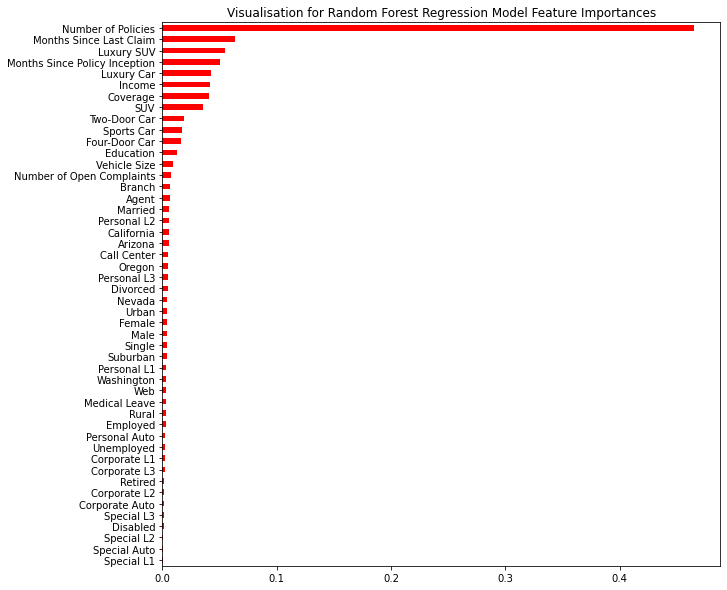

In [186]:
# Visualise which features contributed to the random forest prediction

# feature importances from random forest model and interpreting random forest model.

importances_ltv = rf_ltvModel.feature_importances_

# columns used in random forest model.
columns = x_train.columns

# series between columns and feature importances
rf_ltvGraph = pd.Series(importances_ltv, columns)

# Visualisation for Random Forest Regression Model and Model Interpretation. Getting an idea of the model prediction
figure(figsize=(10,10))

rf_ltvGraph.sort_values().plot.barh(color='red')

plt.title('Visualisation for Random Forest Regression Model Feature Importances')

# the graph shows that the features that contribute to the customer's lifetime value 
# and Number of Policies has the greatest impact on customer lifetime value 
# and it also contributes to the importance of customer lifetime 
# meaning that more policies a customer has the higher their lifetime value is

In [187]:
shapley(x_train_ltv, y_train_ltv, x_test_ltv)

# the customer lifetime value has been predicted to be $5700.87 and 
# Months Since Last Claim, Two Door Car, SUV, Four Door Car, Number of Policies and Coverage are the contributers to the prediction

#### Objectives moving forward

* Select top 10 features that contribute to customer lifetime value 
* Do Hyperparameter tuning on random forest for customer lifetime value
* Try Garadient Boosting for customer lifetime value
* Try feature engineering where we engineer a new feature that basically says how many TOTAL cars the customer has
* Run models again using the engineered feature
* Create a model explanations using pdp box plots and permutation importances
* Refactor the code and clean up everything.
* Build the flask app for this project
* Build plotly app for life expectancy project and Isurance premium project.